# Great Place to Work Survey

**Description of the data:**<br>
The dataset consists of survey responses from employees, focusing on their perceptions and experiences across various workplace dimensions. The data has been organized into 65 questions, grouped into key thematic categories that represent different focus areas within the workplace environment. The columns in the dataset capture average survey scores based on employee characteristics such as age groups, country and tenure. The numbers in each cell represent the average score from all employees in a particular group, for a specific survey question. For instance, the average response from employees aged 26 to 34 on the question "I am given the resources and equipment to do my job" may be reflected in a specific cell.

Grouping: 
1. Resources and Work Environment <br>
Refers to the physical and professional resources provided by the company, including tools, training, and workplace safety, to help employees perform their jobs efficiently and in a secure environment.

2. Caring <br>
Focuses on how the organization shows concern for employees’ well-being, both physically and emotionally. It includes measures for health promotion, work-life balance, and creating an environment where employees feel supported and valued.

3. Fairness & Justice: <br>
This category is about the fairness of opportunities and treatment in the workplace, covering recognition, promotions, avoidance of favoritism, and ensuring that employees are treated with equity and respect regardless of their position.

4. Equity<br>
Refers to fairness and equal treatment across all demographic factors such as age, gender, race, and sexual orientation. It ensures that no group is discriminated against and that fairness is maintained.

5. Compensation/Non-cultural Benefits<br>
Covers how fairly employees are compensated, including wages, profit-sharing, and unique benefits that go beyond traditional compensation.

6. Engagement<br>
Relates to how involved and motivated employees feel in their work, including whether they feel responsible, are willing to give extra effort, and see their job as meaningful. It also includes employee adaptability, fun at work, and long-term commitment.

7. Camaraderie/Community/Collaboration<br>
This category highlights the interpersonal relationships and sense of teamwork within the company. It includes the extent to which employees feel like they are part of a supportive and cooperative environment, where they are welcomed and valued by their peers.

8. Communication<br>
Focuses on how well management communicates with employees, including clarity of expectations, openness to questions, providing feedback, and keeping employees informed about important matters.

9. Leadership Behavior<br>
Refers to the qualities and behaviors of management and executives, particularly their ability to lead ethically, delegate tasks, build trust, make decisions, and involve employees in the decision-making process.

10. Innovation<br>
Relates to how the company encourages creativity and new ideas from employees. It includes recognition of innovation efforts and responsiveness to suggestions and feedback from staff.

11. Pride<br>
This category is about how employees feel about their work, the company, and the impact of the organization. It includes feelings of personal and collective pride in the company’s achievements, customer service, and contributions to the community.


**Limitations of the Analysis:** <br>
The dataset in its aggregated form offers useful high-level insights about the different focus areas and how certain demographic groups differ in their experiences, but it significantly limits the ability to deep dive into individual-level patterns and make causal inferences. An analysis of the relationships between dependent variables and independent variables would require the raw data of individual responses. 

In [1]:
#!pip install pingouin

In [2]:
# libraries 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols 
import pingouin as pg
import plotly.figure_factory as ff
from scipy.cluster.hierarchy import linkage
import numpy as np

## Loading and cleaning the data 

In [3]:
file_path = 'New Sorting.csv' # Loading the manually corrected new file
all_data = pd.read_csv(file_path, encoding='ISO-8859-1', sep = ';', header=[0,1], index_col=0)

all_data.head()

Unnamed: 1_level_0  \
                                                                 Unnamed: 1_level_1   
Ressources and Work Environment   I am given the resources and equipment to do m...   
NaN                               Our facilities contribute to a good working en...   
NaN                               I am offered training or development to furthe...   
NaN                                        This is a physically safe place to work.   
NaN                                                                             NaN   

                                 Unnamed: 2_level_0                 Age  \
                                            Overall 25 years or younger   
Ressources and Work Environment                71.0                70.0   
NaN                                            74.0                73.0   
NaN                                            65.0                62.0   
NaN                                            86.0                84.0   
NaN                                             NaN                 NaN   

                                   Unnamed: 4_level_0   Unnamed: 5_level_0  \
                                 26 years to 34 years 35 years to 44 years   
Ressources and Work Environment                  70.0                 69.0   
NaN                                              75.0                 74.0   
NaN                                              63.0                 66.0   
NaN                                              86.0                 86.0   
NaN                                               NaN                  NaN   

                                   Unnamed: 6_level_0 Unnamed: 7_level_0  \
                                 45 years to 54 years  55 years or older   
Ressources and Work Environment                  76.0               79.0   
NaN                                              73.0               68.0   
NaN                                              68.0               69.0   
NaN                                              87.0               84.0   
NaN                                               NaN                NaN   

                                 Unnamed: 8_level_0 Company Code  \
                                 Unnamed: 8_level_1         1000   
Ressources and Work Environment                 NaN         87.0   
NaN                                             NaN         72.0   
NaN                                             NaN         63.0   
NaN                                             NaN         93.0   
NaN                                             NaN          NaN   

                                 Unnamed: 10_level_0  ...  \
                                                1400  ...   
Ressources and Work Environment                 75.0  ...   
NaN                                             68.0  ...   
NaN                                             70.0  ...   
NaN                                             88.0  ...   
NaN                                              NaN  ...   

                                 Unnamed: 4423_level_0            Tenure  \
                                 Unnamed: 4423_level_1 Less than 2 years   
Ressources and Work Environment                    NaN              72.0   
NaN                                                NaN              77.0   
NaN                                                NaN              67.0   
NaN                                                NaN              88.0   
NaN                                                NaN               NaN   

                                 Unnamed: 4425_level_0 Unnamed: 4426_level_0  \
                                    2 years to 5 years   6 years to 10 years   
Ressources and Work Environment                   73.0                  66.0   
NaN                                               73.0                  71.0   
NaN                                               64.0                  61.0   
NaN        

In [4]:
# Correcting a typo in the index
all_data.index = all_data.index.str.replace('Ressources', 'Resources')

# Renaming columns
all_data = all_data.rename(columns={'Unnamed: 1_level_0': 'Statements', 'Unnamed: 2_level_0': 'Average', 'Unnamed: 1_level_1': 'Statements'})

# Extracting 
#  first and second-level headers from the multi-level columns
header_level_0 = all_data.columns.get_level_values(0).tolist()
header_level_1 = all_data.columns.get_level_values(1).tolist()

# Replace 'Unnamed' with  previous meaningful header (e.g., Age, Tenure)
for i in range(len(header_level_0)):
    if 'Unnamed' in header_level_0[i]:
        header_level_0[i] = header_level_0[i-1] if i > 0 else header_level_0[i]

# Combine updated headers into new multi-index columns
all_data.columns = pd.MultiIndex.from_arrays([header_level_0, header_level_1])

print(all_data.columns)



MultiIndex([(  'Statements',            'Statements'),
            (     'Average',               'Overall'),
            (         'Age',   '25 years or younger'),
            (         'Age',  '26 years to 34 years'),
            (         'Age',  '35 years to 44 years'),
            (         'Age',  '45 years to 54 years'),
            (         'Age',     '55 years or older'),
            (         'Age',    'Unnamed: 8_level_1'),
            ('Company Code',                  '1000'),
            ('Company Code',                  '1400'),
            ...
            (   'Subsidary', 'Unnamed: 4423_level_1'),
            (      'Tenure',     'Less than 2 years'),
            (      'Tenure',    '2 years to 5 years'),
            (      'Tenure',   '6 years to 10 years'),
            (      'Tenure',  '11 years to 15 years'),
            (      'Tenure',  '16 years to 20 years'),
            (      'Tenure',         'Over 20 years'),
            (      'Tenure', 'Unnamed: 4430_level

In [5]:
# Convert index to pandas Series, fill NaN values, and set it back to the index
all_data.index = all_data.index.to_series().fillna(method='ffill')
all_data

/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_25539/1196674157.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_data.index = all_data.index.to_series().fillna(method='ffill')


Statements  \
                                                                        Statements   
Resources and Work Environment   I am given the resources and equipment to do m...   
Resources and Work Environment   Our facilities contribute to a good working en...   
Resources and Work Environment   I am offered training or development to furthe...   
Resources and Work Environment            This is a physically safe place to work.   
Resources and Work Environment                                                 NaN   
...                                                                            ...   
Pride                                        I'm proud to tell others I work here.   
Pride                            I would strongly endorse my company to friends...   
Pride                            Our customers would rate the service we delive...   
Pride                            Taking everything into account, I would say th...   
Pride                            I feel good about the ways we contribute to th...   

                                Average                 Age  \
                                Overall 25 years or younger   
Resources and Work Environment     71.0                70.0   
Resources and Work Environment     74.0                73.0   
Resources and Work Environment     65.0                62.0   
Resources and Work Environment     86.0                84.0   
Resources and Work Environment      NaN                 NaN   
...                                 ...                 ...   
Pride                              84.0                82.0   
Pride                              74.0                70.0   
Pride                              81.0                83.0   
Pride                              77.0                73.0   
Pride                              73.0                70.0   

                                                                           \
                                26 years to 34 years 35 years to 44 years   
Resources and Work Environment                  70.0                 69.0   
Resources and Work Environment                  75.0                 74.0   
Resources and Work Environment                  63.0                 66.0   
Resources and Work Environment                  86.0                 86.0   
Resources and Work Environment                   NaN                  NaN   
...                                              ...                  ...   
Pride                                           83.0                 85.0   
Pride                                           73.0                 75.0   
Pride                                           80.0                 81.0   
Pride                                           75.0                 78.0   
Pride                                           72.0                 75.0   

                                                                        \
                                45 years to 54 years 55 years or older   
Resources and Work Environment                  76.0              79.0   
Resources and Work Environment                  73.0              68.0   
Resources and Work Environment                  68.0              69.0   
Resources and Work Environment                  87.0              84.0   
Resources and Work Environment                   NaN               NaN   
...                                              ...               ...   
Pride                                           86.0              86.0   
Pride                                           78.0              79.0   
Pride                                           81.0              84.0   
Pride                                           81.0              80.0   
Pride                                           75.0              78.0   

                                                   Company Code        ...  \
                                Unnamed: 8_level_1         1000  1400  ...   
Resources an

In [6]:
# Remove Nans
all_data.dropna(how='all', inplace=True)

all_data.dropna(axis=1, how='all', inplace=True)


In [7]:
# Check for NaN values
all_data.isnull().sum().sum()

0

In [8]:
def replace_nan_column(df):
    """
    Rename columns with NaN values to "Average". (to rename the 2nd column)
    """
    df.columns = pd.MultiIndex.from_tuples([(tup[0] if not pd.isna(tup[0]) else 'Average',) + tup[1:] for tup in df.columns])

    return df

In [9]:
all_data_cleaned = replace_nan_column(all_data)

all_data_cleaned[:15]

Statements  \
                                                                        Statements   
Resources and Work Environment   I am given the resources and equipment to do m...   
Resources and Work Environment   Our facilities contribute to a good working en...   
Resources and Work Environment   I am offered training or development to furthe...   
Resources and Work Environment            This is a physically safe place to work.   
Caring                           People are supported by helpful measures in pr...   
Caring                           Management shows a sincere interest in me as a...   
Caring                           People are encouraged to balance their work li...   
Caring                           I am able to take time off from work when I th...   
Caring                                                I can be myself around here.   
Caring                           This is a psychologically and emotionally heal...   
Fairness & Justice               Everyone has an opportunity to get special rec...   
Fairness & Justice                   Promotions go to those who best deserve them.   
Fairness & Justice                               Managers avoid playing favorites.   
Fairness & Justice               If I am unfairly treated, I believe I'll be gi...   
Fairness & Justice               I am treated as a full member here regardless ...   

                                Average                 Age  \
                                Overall 25 years or younger   
Resources and Work Environment     71.0                70.0   
Resources and Work Environment     74.0                73.0   
Resources and Work Environment     65.0                62.0   
Resources and Work Environment     86.0                84.0   
Caring                             76.0                74.0   
Caring                             66.0                64.0   
Caring                             62.0                60.0   
Caring                             71.0                65.0   
Caring                             78.0                79.0   
Caring                             58.0                51.0   
Fairness & Justice                 58.0                55.0   
Fairness & Justice                 50.0                50.0   
Fairness & Justice                 55.0                53.0   
Fairness & Justice                 64.0                64.0   
Fairness & Justice                 78.0                76.0   

                                                                           \
                                26 years to 34 years 35 years to 44 years   
Resources and Work Environment                  70.0                 69.0   
Resources and Work Environment                  75.0                 74.0   
Resources and Work Environment                  63.0                 66.0   
Resources and Work Environment                  86.0                 86.0   
Caring                                          75.0                 77.0   
Caring                                          66.0                 64.0   
Caring                                          60.0                 63.0   
Caring                                          70.0                 73.0   
Caring                                          77.0                 78.0   
Caring                                          57.0                 59.0   
Fairness & Justice                              57.0                 57.0   
Fairness & Justice                              50.0                 49.0   
Fairness & Justice                              55.0                 54.0   
Fairness & Justice                              65.0                 64.0   
Fairness & Justice                              77.0                 78.0   

                                                                        \
                                45 years to 54 years 55 years or older   
Resources and Work Environment                  76.0              79.0   
Resou

In [10]:
def add_index_averages(df):
    """
    Add average of each index to dataframe.
    """
    new_rows = []

    unique_indexes = df.index.unique()

    for index_value in unique_indexes:
        subset = df.loc[index_value]

        new_rows.append(subset)

        average_row = subset.mean(numeric_only=True)

        average_row['Statements'] = 'Average'  

        new_rows.append(pd.DataFrame([average_row], index=[index_value]))

    result_df = pd.concat(new_rows)

    return result_df

In [11]:
all_data_cleaned = add_index_averages(all_data_cleaned)

all_data_cleaned

Statements  \
                                                                        Statements   
Resources and Work Environment   I am given the resources and equipment to do m...   
Resources and Work Environment   Our facilities contribute to a good working en...   
Resources and Work Environment   I am offered training or development to furthe...   
Resources and Work Environment            This is a physically safe place to work.   
Resources and Work Environment                                                 NaN   
...                                                                            ...   
Pride                            I would strongly endorse my company to friends...   
Pride                            Our customers would rate the service we delive...   
Pride                            Taking everything into account, I would say th...   
Pride                            I feel good about the ways we contribute to th...   
Pride                                                                          NaN   

                                   Average                 Age  \
                                   Overall 25 years or younger   
Resources and Work Environment   71.000000               70.00   
Resources and Work Environment   74.000000               73.00   
Resources and Work Environment   65.000000               62.00   
Resources and Work Environment   86.000000               84.00   
Resources and Work Environment   74.000000               72.25   
...                                    ...                 ...   
Pride                            74.000000               70.00   
Pride                            81.000000               83.00   
Pride                            77.000000               73.00   
Pride                            73.000000               70.00   
Pride                            78.428571               75.00   

                                                                           \
                                26 years to 34 years 35 years to 44 years   
Resources and Work Environment                  70.0            69.000000   
Resources and Work Environment                  75.0            74.000000   
Resources and Work Environment                  63.0            66.000000   
Resources and Work Environment                  86.0            86.000000   
Resources and Work Environment                  73.5            73.750000   
...                                              ...                  ...   
Pride                                           73.0            75.000000   
Pride                                           80.0            81.000000   
Pride                                           75.0            78.000000   
Pride                                           72.0            75.000000   
Pride                                           77.0            79.714286   

                                                                        \
                                45 years to 54 years 55 years or older   
Resources and Work Environment             76.000000         79.000000   
Resources and Work Environment             73.000000         68.000000   
Resources and Work Environment             68.000000         69.000000   
Resources and Work Environment             87.000000         84.000000   
Resources and Work Environment             76.000000         75.000000   
...                                              ...               ...   
Pride                                      78.000000         79.000000   
Pride                                      81.000000         84.000000   
Pride                                      81.000000         80.000000   
Pride                                      75.000000         78.000000   
Pride                                      81.571429         82.142857   

                                Company Code                        ...  \
                                        1000       140

In [12]:
all_data_cleaned['Statements'] = all_data_cleaned['Statements'].fillna('Average')

all_data_cleaned

Statements  \
                                                                        Statements   
Resources and Work Environment   I am given the resources and equipment to do m...   
Resources and Work Environment   Our facilities contribute to a good working en...   
Resources and Work Environment   I am offered training or development to furthe...   
Resources and Work Environment            This is a physically safe place to work.   
Resources and Work Environment                                             Average   
...                                                                            ...   
Pride                            I would strongly endorse my company to friends...   
Pride                            Our customers would rate the service we delive...   
Pride                            Taking everything into account, I would say th...   
Pride                            I feel good about the ways we contribute to th...   
Pride                                                                      Average   

                                   Average                 Age  \
                                   Overall 25 years or younger   
Resources and Work Environment   71.000000               70.00   
Resources and Work Environment   74.000000               73.00   
Resources and Work Environment   65.000000               62.00   
Resources and Work Environment   86.000000               84.00   
Resources and Work Environment   74.000000               72.25   
...                                    ...                 ...   
Pride                            74.000000               70.00   
Pride                            81.000000               83.00   
Pride                            77.000000               73.00   
Pride                            73.000000               70.00   
Pride                            78.428571               75.00   

                                                                           \
                                26 years to 34 years 35 years to 44 years   
Resources and Work Environment                  70.0            69.000000   
Resources and Work Environment                  75.0            74.000000   
Resources and Work Environment                  63.0            66.000000   
Resources and Work Environment                  86.0            86.000000   
Resources and Work Environment                  73.5            73.750000   
...                                              ...                  ...   
Pride                                           73.0            75.000000   
Pride                                           80.0            81.000000   
Pride                                           75.0            78.000000   
Pride                                           72.0            75.000000   
Pride                                           77.0            79.714286   

                                                                        \
                                45 years to 54 years 55 years or older   
Resources and Work Environment             76.000000         79.000000   
Resources and Work Environment             73.000000         68.000000   
Resources and Work Environment             68.000000         69.000000   
Resources and Work Environment             87.000000         84.000000   
Resources and Work Environment             76.000000         75.000000   
...                                              ...               ...   
Pride                                      78.000000         79.000000   
Pride                                      81.000000         84.000000   
Pride                                      81.000000         80.000000   
Pride                                      75.000000         78.000000   
Pride                                      81.571429         82.142857   

                                Company Code                        ...  \
                                        1000       140

## Create sub-dfs

In [13]:
def separate_dataframes(df):
    """
    Separate dataframe into multiple dataframes based on the first level of the columns.

    Returns a dictionary of dataframes and a list of the dataframe names.
    """

    first_two_columns = df.iloc[:, :2] 

    unique_headers = df.columns.get_level_values(0).unique()

    dataframes_dict = {}
    dataframe_names = []

    for header in unique_headers:
        if header in ["Statements", "Average"]:
            continue

        header_df = df[df.columns[df.columns.get_level_values(0) == header]]

        combined_df = pd.concat([first_two_columns, header_df], axis=1)
        combined_df.columns = combined_df.columns.get_level_values(1)

        dataframes_dict[header] = combined_df

        dataframe_names.append(header)

    return dataframes_dict, dataframe_names

In [14]:
dataframes_dict, dataframe_names = separate_dataframes(all_data_cleaned)

print("Created DataFrames:", dataframe_names)

company_code_df = dataframes_dict['Company Code']
company_code_df.head() 

Created DataFrames: ['Age', 'Company Code', 'Confidence in Executive Team', 'Corp/Retail', 'cost center', 'cost center ID', 'Country', 'Functional Area', 'Gender', 'Grouping', 'Hub', 'Managerial Level', 'Meaningful Innovation Opportunities', 'Organizational Unit', 'Pers. Sub Area Text', 'Reporting Structure Area', 'Site ID', 'Subgrouping', 'Subsidary', 'Tenure', 'Work Status']


Statements  \
Resources and Work Environment   I am given the resources and equipment to do m...   
Resources and Work Environment   Our facilities contribute to a good working en...   
Resources and Work Environment   I am offered training or development to furthe...   
Resources and Work Environment            This is a physically safe place to work.   
Resources and Work Environment                                             Average   

                                 Overall   1000   1400  1900   2000   2100  \
Resources and Work Environment      71.0  87.00  75.00  79.0  85.00  66.00   
Resources and Work Environment      74.0  72.00  68.00  71.0  94.00  56.00   
Resources and Work Environment      65.0  63.00  70.00  63.0  77.00  50.00   
Resources and Work Environment      86.0  93.00  88.00  87.0  97.00  73.00   
Resources and Work Environment      74.0  78.75  75.25  75.0  88.25  61.25   

                                  2300   2400  2500  ...   7500    7600  7900  \
Resources and Work Environment   88.00  66.00  83.0  ...  94.00   75.00  83.0   
Resources and Work Environment   82.00  68.00  69.0  ...  90.00   88.00  88.0   
Resources and Work Environment   62.00  66.00  62.0  ...  94.00   88.00  86.0   
Resources and Work Environment   93.00  85.00  88.0  ...  97.00  100.00  95.0   
Resources and Work Environment   81.25  71.25  75.5  ...  93.75   87.75  88.0   

                                  8000  8300  8400  8500   8600  8800  8900  
Resources and Work Environment   92.00  66.0  40.0  64.0  74.00  79.0  85.0  
Resources and Work Environment   92.00  62.0  45.0  69.0  70.00  74.0  83.0  
Resources and Work Environment   83.00  62.0  35.0  72.0  59.00  74.0  80.0  
Resources and Work Environment   96.00  86.0  58.0  83.0  86.00  81.0  88.0  
Resources and Work Environment   90.75  69.0  44.5  72.0  72.25  77.0  84.0  

[5 rows x 46 columns]

## Visualizations 

### All data 

In [15]:
# Visualize distribution of scores for the entire dataset by melting the original dataset 
df2 = all_data.copy()
df2.columns = ['_'.join(col).strip() for col in df2.columns.values]
df2_melted = df2.melt(var_name='Statements', value_name='Scores', ignore_index=False).reset_index()
df2_melted = df2_melted[df2_melted['Statements'] != 'Statements_Statements']

fig = px.histogram(
    df2_melted['Scores'], 
    nbins=20, 
    title='Distribution of Scores',
    range_x=[0, 109],
    labels={'value': 'Score'},
    color_discrete_sequence=[px.colors.sequential.Brwnyl[2]],
    text_auto=True 
)

fig.update_traces(
    texttemplate='%{y:.2s}', 
    textfont=dict(family='Avenir', size=12, color='black')  
)


fig.update_layout(
    xaxis_title='Overall Score', 
    yaxis_title='Frequency',    
    plot_bgcolor='white',
    font=dict(family='Avenir', size=16, color='black')  
)

fig.show()


**Interpretation** <br>

1.  The histogram clearly shows two peaks—one in the **80-89** range and another at **100**. This suggests two dominant groups of responses: one with high satisfaction (80-89) and another with extremely high satisfaction (100).

2. The chart is **positively skewed**, indicating that the majority of scores are high. The higher frequencies around scores of 80+ and especially around 100 highlight a generally favorable sentiment. This could be contributed partially to the positive leaning statements in the survey.

3. There are still a reasonable number of responses that can be taken as areas of dissatisfaction and will be target areas of improvement


In [16]:
# Create dataset containing only the average per focus areas
focus_areas_df = all_data_cleaned[all_data_cleaned[('Statements', 'Statements')] == 'Average']
focus_areas_df = focus_areas_df.drop(columns=[('Statements', 'Statements')])

focus_areas_df = focus_areas_df.round(2)

focus_areas_df.head()

Average                 Age  \
                                    Overall 25 years or younger   
Resources and Work Environment        74.00               72.25   
Caring                                68.50               65.50   
Fairness & Justice                    61.00               59.60   
Equity                                81.00               79.75   
Compensation/ non-cultural Benefits   55.67               55.00   

                                                                               \
                                    26 years to 34 years 35 years to 44 years   
Resources and Work Environment                      73.5                73.75   
Caring                                              67.5                69.00   
Fairness & Justice                                  60.8                60.40   
Equity                                              81.5                80.25   
Compensation/ non-cultural Benefits                 54.0                55.67   

                                                                            \
                                    45 years to 54 years 55 years or older   
Resources and Work Environment                     76.00             75.00   
Caring                                             72.17             72.33   
Fairness & Justice                                 63.00             65.00   
Equity                                             82.50             84.50   
Compensation/ non-cultural Benefits                60.00             64.00   

                                    Company Code                       ...  \
                                            1000   1400   1900   2000  ...   
Resources and Work Environment             78.75  75.25  75.00  88.25  ...   
Caring                                     73.33  60.00  68.17  80.33  ...   
Fairness & Justice                         68.60  60.00  66.20  64.20  ...   
Equity                                     89.50  85.25  86.75  89.75  ...   
Compensation/ non-cultural Benefits        69.67  43.33  50.00  69.67  ...   

                                                     Subsidary  \
                                    Salam Stores HUGO BOSS WLL   
Resources and Work Environment                           87.75   
Caring                                                   84.67   
Fairness & Justice                                       83.20   
Equity                                                   87.75   
Compensation/ non-cultural Benefits                      73.67   

                                               Tenure                     \
                                    Less than 2 years 2 years to 5 years   
Resources and Work Environment                  76.00              73.75   
Caring                                          70.67              68.00   
Fairness & Justice                              66.20              62.20   
Equity                                          84.25              82.75   
Compensation/ non-cultural Benefits             59.67              54.67   

                                                                              \
                                    6 years to 10 years 11 years to 15 years   
Resources and Work Environment                    70.25                70.75   
Caring                                            65.50                66.17   
Fairness & Justice                                55.60                54.20   
Equity                                            76.50                75.50   
Compensation/ non-cultural Benefits               51.33                51.67   

                                                                        \
                                    16 years to 20 years Over 20 years   
Resources and Work Environment                     74.25         77.25   
Caring                                             68.17         75.00   
Fairness & Justice                                 

In [17]:
focus_areas_df_reset = focus_areas_df.reset_index()
category_avg = focus_areas_df_reset.groupby(focus_areas_df_reset.columns[0])['Average'].mean().reset_index()
category_avg.columns = ['Category', 'Average_Overall']

category_avg

fig = px.bar(category_avg, x='Category', y='Average_Overall', 
             title='Average Overall Scores by Category',
             labels={'Average_Overall': 'Average Score', 'Category': 'Category'},
             text_auto=True,
             color='Average_Overall',
             color_continuous_scale=px.colors.sequential.Brwnyl)

fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Average Overall Score',
    plot_bgcolor='white',
    font=dict(family='Avenir', color='black')  
)

fig.update_traces(textfont_size=14)  

fig.update_xaxes(tickfont=dict(size=16))  

fig.update_yaxes(tickfont=dict(size=12)) 

fig.show()


**Interpretation** <br>

1.  This graph represents the average scores in the GPTW survey for these focus areas. Scoring is done from 0-100 and we were given aggregate values based on different groupings such as age groups, tenure, department, country and many more. All are reasonably high, with the lowest being 55.67 (Compensation/ Non-cultural Benefits) and highest being Equity at 81. 

2. There is reasonable variance in the different values which brings up interest in targeting specific focus areas that the company can target to improve employee satisfaction in. 


In [18]:
# Looking at the deviation from the mean per focus areas
category_avg['Absolute Difference from Given Avg'] = category_avg['Average_Overall'] - category_avg['Average_Overall'].mean()
category_avg

fig = px.bar(category_avg,
             x='Category',
        y='Absolute Difference from Given Avg',
        color='Absolute Difference from Given Avg',
        color_continuous_scale=px.colors.sequential.Brwnyl,
        range_color=[category_avg['Absolute Difference from Given Avg'].min(),
                     category_avg['Absolute Difference from Given Avg'].max()]
    )

fig.update_layout(
        title="Strengths and Weaknesses Relative to Given Average",
        xaxis_title="Focus Areas",
        yaxis_title="Absolute Difference from Given Avg", 
        plot_bgcolor='white',
        font=dict(family='Avenir', size=16, color='black') 

    )

fig.show()




**Interpretation** <br>

1. Focus areas **Equity** and **Pride** show significant positive deviations from the given average, indicating that employees perceive these areas very positively compared to other focus areas. This suggests that fairness in treatment across demographics (such as age, gender, and race) and a sense of pride in the workplace are key strengths of the organization.

2. The category **Compensation/Non-cultural Benefits** shows the largest negative deviation from the given average, indicating that employees feel this is a major area of dissatisfaction. This may suggest that employees are not satisfied with their compensation, non-salary benefits, or feel underappreciated in terms of tangible rewards. 

3. The **Fairness & Justice** category shows a relatively low score as well, indicating that employees may perceive a lack of fairness in areas such as recognition, promotions, and the handling of grievances. This suggests that the organization may need to address concerns about equitable treatment and favoritism to improve overall employee satisfaction in this area.



In [19]:
focus_areas_df

Average                 Age  \
                                      Overall 25 years or younger   
Resources and Work Environment          74.00               72.25   
Caring                                  68.50               65.50   
Fairness & Justice                      61.00               59.60   
Equity                                  81.00               79.75   
Compensation/ non-cultural Benefits     55.67               55.00   
Engagement                              73.38               70.00   
Camaraderie/ Community /Collaboration   70.88               69.00   
Communication                           67.71               69.29   
Leadership Behavior                     68.64               69.64   
Innovation                              67.50               67.50   
Pride                                   78.43               75.00   

                                                            \
                                      26 years to 34 years   
Resources and Work Environment                       73.50   
Caring                                               67.50   
Fairness & Justice                                   60.80   
Equity                                               81.50   
Compensation/ non-cultural Benefits                  54.00   
Engagement                                           72.38   
Camaraderie/ Community /Collaboration                70.75   
Communication                                        67.57   
Leadership Behavior                                  68.36   
Innovation                                           66.50   
Pride                                                77.00   

                                                            \
                                      35 years to 44 years   
Resources and Work Environment                       73.75   
Caring                                               69.00   
Fairness & Justice                                   60.40   
Equity                                               80.25   
Compensation/ non-cultural Benefits                  55.67   
Engagement                                           74.50   
Camaraderie/ Community /Collaboration                71.12   
Communication                                        66.86   
Leadership Behavior                                  67.73   
Innovation                                           67.00   
Pride                                                79.71   

                                                                              \
                                      45 years to 54 years 55 years or older   
Resources and Work Environment                       76.00             75.00   
Caring                                               72.17             72.33   
Fairness & Justice                                   63.00             65.00   
Equity                                               82.50             84.50   
Compensation/ non-cultural Benefits                  60.00             64.00   
Engagement                                           76.50             76.50   
Camaraderie/ Community /Collaboration                72.00             72.38   
Communication                                        70.29             70.29   
Leadership Behavior                                  70.82             72.45   
Innovation                                           70.00             67.50   
Pride                                                81.57             82.14   

                                      Company Code                       ...  \
                                              1000   1400   1900   2000  ...   
Resources and Work Environment               78.75  75.25  75.00  88.25  ...   
Caring                                       73.33  60.00  68.17  80.33  ...   
Fairness & Justice                           68.60  60.00  66.20  64.20  ...   
Equity                                       89.50  85.25  86.75  89.75  ...   
Compe

In [20]:
# Convert the second header to main header
focus_areas_df.columns = focus_areas_df.columns.get_level_values(1)

# Drop the last column (no name)
focus_areas_df.drop(focus_areas_df.columns[-1], axis=1, inplace=True)

focus_areas_df['Row_Variance'] = focus_areas_df.var(axis=1, numeric_only=True)

focus_areas_df

Overall  25 years or younger  \
Resources and Work Environment           74.00                72.25   
Caring                                   68.50                65.50   
Fairness & Justice                       61.00                59.60   
Equity                                   81.00                79.75   
Compensation/ non-cultural Benefits      55.67                55.00   
Engagement                               73.38                70.00   
Camaraderie/ Community /Collaboration    70.88                69.00   
Communication                            67.71                69.29   
Leadership Behavior                      68.64                69.64   
Innovation                               67.50                67.50   
Pride                                    78.43                75.00   

                                       26 years to 34 years  \
Resources and Work Environment                        73.50   
Caring                                                67.50   
Fairness & Justice                                    60.80   
Equity                                                81.50   
Compensation/ non-cultural Benefits                   54.00   
Engagement                                            72.38   
Camaraderie/ Community /Collaboration                 70.75   
Communication                                         67.57   
Leadership Behavior                                   68.36   
Innovation                                            66.50   
Pride                                                 77.00   

                                       35 years to 44 years  \
Resources and Work Environment                        73.75   
Caring                                                69.00   
Fairness & Justice                                    60.40   
Equity                                                80.25   
Compensation/ non-cultural Benefits                   55.67   
Engagement                                            74.50   
Camaraderie/ Community /Collaboration                 71.12   
Communication                                         66.86   
Leadership Behavior                                   67.73   
Innovation                                            67.00   
Pride                                                 79.71   

                                       45 years to 54 years  \
Resources and Work Environment                        76.00   
Caring                                                72.17   
Fairness & Justice                                    63.00   
Equity                                                82.50   
Compensation/ non-cultural Benefits                   60.00   
Engagement                                            76.50   
Camaraderie/ Community /Collaboration                 72.00   
Communication                                         70.29   
Leadership Behavior                                   70.82   
Innovation                                            70.00   
Pride                                                 81.57   

                                       55 years or older   1000   1400   1900  \
Resources and Work Environment                     75.00  78.75  75.25  75.00   
Caring                                             72.33  73.33  60.00  68.17   
Fairness & Justice                                 65.00  68.60  60.00  66.20   
Equity                                             84.50  89.50  85.25  86.75   
Compensation/ non-cultural Benefits                64.00  69.67  43.33  50.00   
Engagement                                         76.50  78.38  68.62  69.38   
Camaraderie/ Community /Collaboration              72.38  76.62  66.62  71.62   
Communication                                      70.29  73.14  65.57  74.43   
Leadership Behavior                                72.45  74.45  66.64  73.36   
Innovation                                         67.50  71.50  62.00  68.00   
Pride                   

In [21]:
# Save focus_areas_df to csv
#focus_areas_df.to_csv('focus_areas_df.csv')

Identify the focus areas with the highest and lowest average and the highest and lowest variance 

In [22]:
# Top 3 categories with the highest variance
top_categories_var = focus_areas_df.sort_values(by='Row_Variance', ascending=False)

top_3_categories_var = top_categories_var.head(3)

print(top_3_categories_var[['Row_Variance']])

                                     Row_Variance
Compensation/ non-cultural Benefits    491.043502
Innovation                             363.757308
Fairness & Justice                     361.285434


In [23]:
# Top 3 categories with the lowest variance
top_categories_var_bottom = focus_areas_df.sort_values(by='Row_Variance', ascending=True)

top_3_categories_var_bottom = top_categories_var_bottom.head(3)

print(top_3_categories_var_bottom[['Row_Variance']])

             Row_Variance
Equity         182.559033
Pride          219.926707
Engagement     236.567512


In [24]:
# Top 3 categories with the highest average
top_categories_avg = focus_areas_df.sort_values(by='Overall', ascending=False)

top_3_categories_avg = top_categories_avg.head(3)

print(top_3_categories_avg[['Overall']])

                                 Overall
Equity                             81.00
Pride                              78.43
Resources and Work Environment     74.00


In [25]:
# Top 3 categories with the lowest average
categories_avg_bottom = focus_areas_df.sort_values(by='Overall', ascending=True)

categories_avg_bottom = categories_avg_bottom.head(3)

print(categories_avg_bottom[['Overall']])

                                     Overall
Compensation/ non-cultural Benefits    55.67
Fairness & Justice                     61.00
Innovation                             67.50


In [26]:
# Visualize the distribution of focus areas with regard to variance and average
categories = focus_areas_df.index.tolist()  
overall_avg = focus_areas_df['Overall'].tolist()  
variance = focus_areas_df['Row_Variance'].tolist()  

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=overall_avg, 
    y=variance,
    mode='markers',
    marker=dict(size=10, color=variance, colorscale='Brwnyl_r', showscale=True),  
    text=categories  
))

fig.update_layout(
    title='Scatter Plot of Averages and Variances for Focus Areas',
    xaxis_title='Overall Average',
    yaxis_title='Row Variance',
    width=800, 
    height=500,
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    font=dict(family='Avenir', color='black'),  
    xaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige',  
        zeroline=True, zerolinecolor='beige'  
    ),
    yaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige', 
        zeroline=True, zerolinecolor='beige'  
    ),
    showlegend=False  
)

fig.show()

#### Correlation Analysis

In [27]:
# Transpose df for correlation matrix
transposed_focus_areas_df = focus_areas_df.transpose()

correlation_matrix = transposed_focus_areas_df.corr()

transposed_focus_areas_df.head()

Resources and Work Environment   Caring   \
Overall                                         74.00    68.50   
25 years or younger                             72.25    65.50   
26 years to 34 years                            73.50    67.50   
35 years to 44 years                            73.75    69.00   
45 years to 54 years                            76.00    72.17   

                      Fairness & Justice  Equity  \
Overall                             61.0   81.00   
25 years or younger                 59.6   79.75   
26 years to 34 years                60.8   81.50   
35 years to 44 years                60.4   80.25   
45 years to 54 years                63.0   82.50   

                      Compensation/ non-cultural Benefits  Engagement   \
Overall                                             55.67        73.38   
25 years or younger                                 55.00        70.00   
26 years to 34 years                                54.00        72.38   
35 years to 44 years                                55.67        74.50   
45 years to 54 years                                60.00        76.50   

                      Camaraderie/ Community /Collaboration  Communication   \
Overall                                               70.88           67.71   
25 years or younger                                   69.00           69.29   
26 years to 34 years                                  70.75           67.57   
35 years to 44 years                                  71.12           66.86   
45 years to 54 years                                  72.00           70.29   

                      Leadership Behavior   Innovation   Pride   
Overall                              68.64         67.5   78.43  
25 years or younger                  69.64         67.5   75.00  
26 years to 34 years                 68.36         66.5   77.00  
35 years to 44 years                 67.73         67.0   79.71  
45 years to 54 years                 70.82         70.0   81.57

In [28]:
# Create a heatmap of correlation matrix
fig = px.imshow(correlation_matrix,
                labels=dict(x="Focus Areas", y="Focus Areas", color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale=px.colors.sequential.Brwnyl_r) 


fig.update_layout(
    title='Heatmap of Correlation Between Focus Areas',
    width=800, 
    height=800,
    font=dict(family='Avenir', color='black'),  
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    xaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',  
    ),
    yaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',  
    )
)

fig.show()

In [29]:
correlation_matrix.head()

Resources and Work Environment   \
Resources and Work Environment                              1.000000   
Caring                                                      0.781817   
Fairness & Justice                                          0.758905   
Equity                                                      0.639467   
Compensation/ non-cultural Benefits                         0.680066   

                                      Caring   Fairness & Justice    Equity  \
Resources and Work Environment       0.781817            0.758905  0.639467   
Caring                               1.000000            0.832759  0.683239   
Fairness & Justice                   0.832759            1.000000  0.763188   
Equity                               0.683239            0.763188  1.000000   
Compensation/ non-cultural Benefits  0.682825            0.722363  0.535124   

                                     Compensation/ non-cultural Benefits  \
Resources and Work Environment                                  0.680066   
Caring                                                          0.682825   
Fairness & Justice                                              0.722363   
Equity                                                          0.535124   
Compensation/ non-cultural Benefits                             1.000000   

                                     Engagement   \
Resources and Work Environment          0.758122   
Caring                                  0.861941   
Fairness & Justice                      0.821548   
Equity                                  0.656091   
Compensation/ non-cultural Benefits     0.723730   

                                     Camaraderie/ Community /Collaboration  \
Resources and Work Environment                                    0.770608   
Caring                                                            0.847091   
Fairness & Justice                                                0.845819   
Equity                                                            0.724102   
Compensation/ non-cultural Benefits                               0.669703   

                                     Communication   Leadership Behavior   \
Resources and Work Environment             0.736874              0.769076   
Caring                                     0.831613              0.881256   
Fairness & Justice                         0.902394              0.911950   
Equity                                     0.724757              0.763272   
Compensation/ non-cultural Benefits        0.667122              0.702263   

                                     Innovation     Pride   
Resources and Work Environment          0.733478  0.742195  
Caring                                  0.843625  0.799532  
Fairness & Justice                      0.851096  0.742759  
Equity                                  0.652844  0.611758  
Compensation/ non-cultural Benefits     0.679670  0.718530

Top 3 Correlation Pairs:
 Leadership Behavior   Communication         0.939501
                      Fairness & Justice    0.911950
Communication         Fairness & Justice    0.902394
dtype: float64


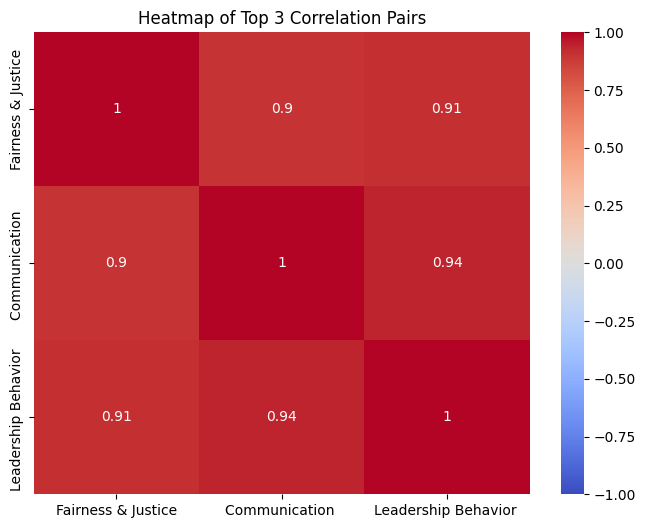

In [30]:
# Extract  upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Unstack the matrix to get pairs and sort them by correlation value
sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False)

# Get the top 3 pairs
top_3_pairs = sorted_pairs.head(3)
print("Top 3 Correlation Pairs:\n", top_3_pairs)

# Extract the corresponding indices for the top 3 pairs
top_3_indices = top_3_pairs.index.tolist()
focus_areas = list(set([idx[0] for idx in top_3_indices] + [idx[1] for idx in top_3_indices]))

# Filter the correlation matrix for these focus areas
filtered_corr_matrix = correlation_matrix.loc[focus_areas, focus_areas]

plt.figure(figsize=(8, 6))
sns.heatmap(filtered_corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Heatmap of Top 3 Correlation Pairs')
plt.show()

**Interpretation** <br>

1. **Leadership Behavior** and **Communication** exhibit a high correlation, suggesting that employees who perceive strong leadership behavior also tend to see effective communication from their leaders. This likely indicates that leaders who are ethical, trust-building, and inclusive in decision-making are also seen as good communicators, which reinforces positive perceptions of both leadership and communication.

2. This high correlation suggests that employees who feel a strong **sense of fairness and justice** in the workplace also perceive **leadership behavior** positively. This strong correlation indicates that employees who feel they are treated fairly and justly also perceive leadership behavior as positive. Leaders who exhibit fairness in how they treat their employees, avoiding favoritism and ensuring equity, are likely seen as effective, trustworthy leaders, and this reinforces positive views of leadership behavior in general.

3. The correlation between **fairness** and **communication** implies that employees who perceive fairness and justice in the workplace also feel that communication is transparent and effective. This suggests that clear, open, and inclusive communication is critical for reinforcing perceptions of fairness within the organization. If employees are well-informed, they are more likely to feel that they are being treated fairly.



### **Analysis of the Statements**

In [31]:
# Add variance column 
all_data_cleaned['Row_Variance'] = all_data_cleaned.var(axis=1, numeric_only=True)

all_data_cleaned.head()

Statements  \
                                                                        Statements   
Resources and Work Environment   I am given the resources and equipment to do m...   
Resources and Work Environment   Our facilities contribute to a good working en...   
Resources and Work Environment   I am offered training or development to furthe...   
Resources and Work Environment            This is a physically safe place to work.   
Resources and Work Environment                                             Average   

                                Average                 Age  \
                                Overall 25 years or younger   
Resources and Work Environment     71.0               70.00   
Resources and Work Environment     74.0               73.00   
Resources and Work Environment     65.0               62.00   
Resources and Work Environment     86.0               84.00   
Resources and Work Environment     74.0               72.25   

                                                                           \
                                26 years to 34 years 35 years to 44 years   
Resources and Work Environment                  70.0                69.00   
Resources and Work Environment                  75.0                74.00   
Resources and Work Environment                  63.0                66.00   
Resources and Work Environment                  86.0                86.00   
Resources and Work Environment                  73.5                73.75   

                                                                        \
                                45 years to 54 years 55 years or older   
Resources and Work Environment                  76.0              79.0   
Resources and Work Environment                  73.0              68.0   
Resources and Work Environment                  68.0              69.0   
Resources and Work Environment                  87.0              84.0   
Resources and Work Environment                  76.0              75.0   

                                Company Code               ...  \
                                        1000   1400  1900  ...   
Resources and Work Environment         87.00  75.00  79.0  ...   
Resources and Work Environment         72.00  68.00  71.0  ...   
Resources and Work Environment         63.00  70.00  63.0  ...   
Resources and Work Environment         93.00  88.00  87.0  ...   
Resources and Work Environment         78.75  75.25  75.0  ...   

                                           Tenure                     \
                                Less than 2 years 2 years to 5 years   
Resources and Work Environment               72.0              73.00   
Resources and Work Environment               77.0              73.00   
Resources and Work Environment               67.0              64.00   
Resources and Work Environment               88.0              85.00   
Resources and Work Environment               76.0              73.75   

                                                                          \
                                6 years to 10 years 11 years to 15 years   
Resources and Work Environment                66.00                66.00   
Resources and Work Environment                71.00                71.00   
Resources and Work Environment                61.00                62.00   
Resources and Work Environment                83.00                84.00   
Resources and Work Environment                70.25                70.75   

                                                                    \
                                16 years to 20 years Over 20 years   
Resources and Work Environment                 73.00         78.00   
Resources and Work Environment                 73.00         73.00   
Resources and Work Environment                 64.00         68.00   
Resources and Work Environment                 87.00         90.00   
Resources and Work Environment                 

In [32]:
# Visualize the distribution of survey statement with regard to variance and average
categories_statements = all_data_cleaned.index.get_level_values(0).tolist()  
unique_categories = pd.Categorical(categories_statements).categories 

statements = all_data_cleaned[('Statements', 'Statements')].tolist()  
overall_avg_statements = all_data_cleaned[('Average', 'Overall')].tolist()
variance_statements = all_data_cleaned['Row_Variance'].tolist() 

colors = px.colors.sequential.Brwnyl_r  

fig = go.Figure()

for i, category in enumerate(unique_categories):
    category_mask = [cat == category for cat in categories_statements]
    
    fig.add_trace(go.Scatter(
        x=pd.Series(overall_avg_statements)[category_mask], 
        y=pd.Series(variance_statements)[category_mask],
        mode='markers',
        marker=dict(size=10, color=colors[i % len(colors)]), 
        name=category,  
        text=pd.Series(statements)[category_mask]  
    ))

fig.update_layout(
    title='Scatter Plot of Averages and Variances for Focus Areas',
    xaxis_title='Overall Average',
    yaxis_title='Row Variance',
    width=1000, 
    height=500,
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    font=dict(family='Avenir', color='black'),  
    xaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige',  
        zeroline=True, zerolinecolor='beige'  
    ),
    yaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige', 
        zeroline=True, zerolinecolor='beige'  
    ),
    showlegend=True 
)

fig.show()

**Interpretation**<br>

1. There is a noticeable **inverse relationship between the overall average and the row variance**. Categories with higher overall averages tend to have lower variances, meaning they are more consistently rated across different groups, while categories with lower averages show greater variability in responses, indicating differing perceptions among employees.

2. Categories such as **Pride** and **Equity** show high average scores with relatively low variance. This suggests that these areas are strengths across the organization, with consistent positive ratings from employees regardless of differences such as age, tenure, or job level.

3. **Compensation & non-cultural Benefits** and **Fairness & Justice** exhibit both low average scores and high variance, suggesting that perceptions in these areas vary greatly between different employee groups. This could point to areas where improvement is needed, particularly for certain subgroups.

### Tenure 

In [33]:
# Create a subdatadrame containing only tenure data points
tenure_df = all_data_cleaned['Tenure']

statements_column = all_data_cleaned[('Statements', 'Statements')]

tenure_df.insert(0, 'Statements', statements_column)

tenure_df.head()

Statements  \
Resources and Work Environment   I am given the resources and equipment to do m...   
Resources and Work Environment   Our facilities contribute to a good working en...   
Resources and Work Environment   I am offered training or development to furthe...   
Resources and Work Environment            This is a physically safe place to work.   
Resources and Work Environment                                             Average   

                                 Less than 2 years  2 years to 5 years  \
Resources and Work Environment                72.0               73.00   
Resources and Work Environment                77.0               73.00   
Resources and Work Environment                67.0               64.00   
Resources and Work Environment                88.0               85.00   
Resources and Work Environment                76.0               73.75   

                                 6 years to 10 years  11 years to 15 years  \
Resources and Work Environment                 66.00                 66.00   
Resources and Work Environment                 71.00                 71.00   
Resources and Work Environment                 61.00                 62.00   
Resources and Work Environment                 83.00                 84.00   
Resources and Work Environment                 70.25                 70.75   

                                 16 years to 20 years  Over 20 years  
Resources and Work Environment                  73.00          78.00  
Resources and Work Environment                  73.00          73.00  
Resources and Work Environment                  64.00          68.00  
Resources and Work Environment                  87.00          90.00  
Resources and Work Environment                  74.25          77.25

In [34]:
# Filter the averages per focus area

tenure_avg_df = tenure_df[tenure_df['Statements'].str.contains('Average', case=False)]

tenure_avg_df = tenure_avg_df.drop(columns='Statements')

tenure_avg_df.head()


Less than 2 years  2 years to 5 years  \
Resources and Work Environment               76.000000           73.750000   
Caring                                       70.666667           68.000000   
Fairness & Justice                           66.200000           62.200000   
Equity                                       84.250000           82.750000   
Compensation/ non-cultural Benefits          59.666667           54.666667   

                                     6 years to 10 years  \
Resources and Work Environment                 70.250000   
Caring                                         65.500000   
Fairness & Justice                             55.600000   
Equity                                         76.500000   
Compensation/ non-cultural Benefits            51.333333   

                                     11 years to 15 years  \
Resources and Work Environment                  70.750000   
Caring                                          66.166667   
Fairness & Justice                              54.200000   
Equity                                          75.500000   
Compensation/ non-cultural Benefits             51.666667   

                                     16 years to 20 years  Over 20 years  
Resources and Work Environment                  74.250000          77.25  
Caring                                          68.166667          75.00  
Fairness & Justice                              55.600000          63.00  
Equity                                          78.250000          82.75  
Compensation/ non-cultural Benefits             55.666667          62.00

In [35]:
# Add Variance and Average 
tenure_complete_df = tenure_df.copy()
tenure_complete_df['Row_Variance'] = tenure_complete_df.var(axis=1, numeric_only=True)
tenure_complete_df['Row_Average'] = tenure_complete_df.mean(axis=1, numeric_only=True)
tenure_complete_df.head()

Statements  \
Resources and Work Environment   I am given the resources and equipment to do m...   
Resources and Work Environment   Our facilities contribute to a good working en...   
Resources and Work Environment   I am offered training or development to furthe...   
Resources and Work Environment            This is a physically safe place to work.   
Resources and Work Environment                                             Average   

                                 Less than 2 years  2 years to 5 years  \
Resources and Work Environment                72.0               73.00   
Resources and Work Environment                77.0               73.00   
Resources and Work Environment                67.0               64.00   
Resources and Work Environment                88.0               85.00   
Resources and Work Environment                76.0               73.75   

                                 6 years to 10 years  11 years to 15 years  \
Resources and Work Environment                 66.00                 66.00   
Resources and Work Environment                 71.00                 71.00   
Resources and Work Environment                 61.00                 62.00   
Resources and Work Environment                 83.00                 84.00   
Resources and Work Environment                 70.25                 70.75   

                                 16 years to 20 years  Over 20 years  \
Resources and Work Environment                  73.00          78.00   
Resources and Work Environment                  73.00          73.00   
Resources and Work Environment                  64.00          68.00   
Resources and Work Environment                  87.00          90.00   
Resources and Work Environment                  74.25          77.25   

                                 Row_Variance  Row_Average  
Resources and Work Environment      21.466667    64.209524  
Resources and Work Environment       4.800000    63.257143  
Resources and Work Environment       7.466667    56.209524  
Resources and Work Environment       6.966667    74.852381  
Resources and Work Environment       7.760417    64.287202

**Trend Visualization**

In [36]:
tenure_periods = tenure_avg_df.columns.tolist()  
categories = tenure_avg_df.index.tolist()  

colors = px.colors.sequential.Brwnyl_r  

fig = go.Figure()

for i, category in enumerate(categories):
    fig.add_trace(go.Scatter(
        x=tenure_periods,  
        y=tenure_avg_df.loc[category].values,  
        mode='lines+markers',  
        marker=dict(size=8, color=colors[i % len(colors)]),  
        name=category  
    ))

fig.update_layout(
    title='Line Plot of Averages by Tenure for Focus Areas',
    xaxis_title='Tenure Period',
    yaxis_title='Average Score',
    width=1200, 
    height=500,
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    font=dict(family='Avenir', color='black'),  
    xaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige',  
        zeroline=True, zerolinecolor='beige'  
    ),
    yaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige', 
        zeroline=True, zerolinecolor='beige'  
    ),
    showlegend=True 
)

fig.show()

**Interpretation** <br>

1. Across most categories, employees with a tenure of **6 to 10 years** tend to report the lowest average scores. This suggests that employees in this tenure group might experience a dip in satisfaction or engagement, particularly in areas like **Compensation & non-cultural Benefits** and **Fairness & Justice**.

2. Employees who have been with the organization for **more than 15 years** show an upward trend in scores across almost all categories. This indicates that after a mid-tenure dip, employees who stay longer tend to rate their experiences more positively, perhaps due to stability or increased familiarity with the organization.

3. Employees with less than 2 years of tenure and those with over 20 years tend to give higher scores in most categories. This suggests that new hires and long-tenured employees feel particularly positive about their experiences compared to those in the middle of their careers.

In [37]:
tenure_groups = tenure_avg_df.columns.tolist()  
focus_areas = tenure_avg_df.index.tolist() 

colors = px.colors.sequential.Brwnyl_r  

fig = go.Figure()

for i, tenure_group in enumerate(tenure_groups):
    fig.add_trace(go.Scatter(
        x=focus_areas,  
        y=tenure_avg_df[tenure_group].values,  
        mode='lines+markers',
        marker=dict(size=8, color=colors[i % len(colors)]),  
        name=tenure_group  
    ))

fig.update_layout(
    title='Line Plot of Tenure Groups Across Focus Areas',
    xaxis_title='Focus Areas (Categories)', 
    yaxis_title='Average Score',  
    width=1000,
    height=500,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Avenir', color='black'),
    xaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige',
        zeroline=True, zerolinecolor='beige'
    ),
    yaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige',
        zeroline=True, zerolinecolor='beige'
    ),
    showlegend=True  
)

fig.show()

**Interpretation** <br>

1. **Pride** consistently has the highest scores across all tenure groups, particularly for employees with more than 20 years of tenure. This indicates that employees, especially those with long tenure, feel a strong sense of pride and accomplishment in their work.

2. **Fairness & Justice and Compensation & non-cultural Benefits** reappear again as the areas with room for improvement. 

In [38]:
categories_statements = tenure_complete_df.index.get_level_values(0).tolist()  
unique_categories = pd.Categorical(categories_statements).categories 

statements_tenure = tenure_complete_df['Statements'].tolist()  
overall_tenure = tenure_complete_df['Row_Average'].tolist()
variance_tenure = tenure_complete_df['Row_Variance'].tolist() 

colors = px.colors.sequential.Brwnyl_r  

fig = go.Figure()

for i, category in enumerate(unique_categories):
    category_mask = [cat == category for cat in categories_statements]
    
    fig.add_trace(go.Scatter(
        x=pd.Series(overall_tenure)[category_mask], 
        y=pd.Series(variance_tenure)[category_mask],
        mode='markers',
        marker=dict(size=10, color=colors[i % len(colors)]), 
        name=category,  
        text=pd.Series(statements_tenure)[category_mask]  
    ))

fig.update_layout(
    title='Scatter Plot of Averages and Variances for Focus Areas',
    xaxis_title='Overall Average',
    yaxis_title='Row Variance',
    width=1000, 
    height=500,
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    font=dict(family='Avenir', color='black'),  
    xaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige',  
        zeroline=True, zerolinecolor='beige'  
    ),
    yaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige', 
        zeroline=True, zerolinecolor='beige'  
    ),
    showlegend=True 
)

fig.show()

#### Correlation Analyis 

In [39]:
transposed_avg_tenure_df = tenure_avg_df.transpose()

correlation_matrix_tenure = transposed_avg_tenure_df.corr()

transposed_avg_tenure_df.head()

Resources and Work Environment     Caring   \
Less than 2 years                               76.00  70.666667   
2 years to 5 years                              73.75  68.000000   
6 years to 10 years                             70.25  65.500000   
11 years to 15 years                            70.75  66.166667   
16 years to 20 years                            74.25  68.166667   

                      Fairness & Justice  Equity  \
Less than 2 years                   66.2   84.25   
2 years to 5 years                  62.2   82.75   
6 years to 10 years                 55.6   76.50   
11 years to 15 years                54.2   75.50   
16 years to 20 years                55.6   78.25   

                      Compensation/ non-cultural Benefits  Engagement   \
Less than 2 years                               59.666667       74.250   
2 years to 5 years                              54.666667       72.625   
6 years to 10 years                             51.333333       71.625   
11 years to 15 years                            51.666667       72.875   
16 years to 20 years                            55.666667       74.875   

                      Camaraderie/ Community /Collaboration  Communication   \
Less than 2 years                                    72.875       73.285714   
2 years to 5 years                                   71.000       68.714286   
6 years to 10 years                                  68.000       62.000000   
11 years to 15 years                                 67.875       61.714286   
16 years to 20 years                                 70.625       64.714286   

                      Leadership Behavior   Innovation      Pride   
Less than 2 years                73.818182         71.0  79.571429  
2 years to 5 years               69.181818         68.0  77.714286  
6 years to 10 years              63.545455         62.5  76.142857  
11 years to 15 years             62.272727         63.5  78.285714  
16 years to 20 years             65.454545         64.0  80.000000

In [40]:
fig = px.imshow(correlation_matrix_tenure,
                labels=dict(x="Focus Areas", y="Focus Areas", color="Correlation"),
                x=correlation_matrix_tenure.columns,
                y=correlation_matrix_tenure.columns,
                color_continuous_scale=px.colors.sequential.Brwnyl_r) 


fig.update_layout(
    title='Heatmap of Correlation Between Focus Areas',
    width=800, 
    height=800,
    font=dict(family='Avenir', color='black'),  
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    xaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',  
    ),
    yaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',  
    )
)

fig.show()

### Managerial Level 

In [41]:
managerial_df = all_data_cleaned['Managerial Level']

statements_column = all_data_cleaned[('Statements', 'Statements')]

managerial_df.insert(0, 'Statements', statements_column)

managerial_df.head()

Statements  \
Resources and Work Environment   I am given the resources and equipment to do m...   
Resources and Work Environment   Our facilities contribute to a good working en...   
Resources and Work Environment   I am offered training or development to furthe...   
Resources and Work Environment            This is a physically safe place to work.   
Resources and Work Environment                                             Average   

                                 Employee/Individual Contributor (no people management responsibility)  \
Resources and Work Environment                                                75.0                       
Resources and Work Environment                                                74.0                       
Resources and Work Environment                                                64.0                       
Resources and Work Environment                                                87.0                       
Resources and Work Environment                                                75.0                       

                                 Frontline Manager or Supervisor (first tier manager; supervises other employees, not other managers)  \
Resources and Work Environment                                               68.00                                                      
Resources and Work Environment                                               73.00                                                      
Resources and Work Environment                                               67.00                                                      
Resources and Work Environment                                               85.00                                                      
Resources and Work Environment                                               73.25                                                      

                                 Mid-Level Manager (runs major departments or divisions, but not part of executive team)  \
Resources and Work Environment                                                69.0                                         
Resources and Work Environment                                                74.0                                         
Resources and Work Environment                                                67.0                                         
Resources and Work Environment                                                86.0                                         
Resources and Work Environment                                                74.0                                         

                                 Executive/C-Level Leader (Highest level leaders; CEO/President and the C-suite executives who report to CEO)  
Resources and Work Environment                                               59.00                                                             
Resources and Work Environment                                               75.00                                                             
Resources and Work Environment                                               62.00                                                             
Resources and Work Environment                                               81.00                                                             
Resources and Work Environment                                               69.25

In [42]:
managerial_avg_df = managerial_df[managerial_df['Statements'].str.contains('Average', case=False)]

managerial_avg_df = managerial_avg_df.drop(columns='Statements')


# rename the columns
managerial_avg_df.columns = ['Non managerial', 'Entry-level', 'Mid-level', 'C-level']

managerial_avg_df.head()

Non managerial  Entry-level  Mid-level  \
Resources and Work Environment            75.000000    73.250000      74.00   
Caring                                    68.833333    68.166667      70.00   
Fairness & Justice                        60.800000    62.000000      64.20   
Equity                                    82.750000    81.250000      80.25   
Compensation/ non-cultural Benefits       57.333333    53.333333      56.00   

                                       C-level  
Resources and Work Environment       69.250000  
Caring                               67.166667  
Fairness & Justice                   54.800000  
Equity                               70.250000  
Compensation/ non-cultural Benefits  56.000000

**Trend Visualization**

In [43]:
managerial_groups = managerial_avg_df.columns.tolist()  
categories = managerial_avg_df.index.tolist()  

colors = px.colors.sequential.Brwnyl_r  

fig = go.Figure()

for i, category in enumerate(categories):
    fig.add_trace(go.Scatter(
        x=managerial_groups,  
        y=managerial_avg_df.loc[category].values,  
        mode='lines+markers',  
        marker=dict(size=8, color=colors[i % len(colors)]),  
        name=category  
    ))

fig.update_layout(
    title='Line Plot of Averages by Age Groups for Focus Areas',
    xaxis_title='Age Group',
    yaxis_title='Average Score',
    width=1200, 
    height=500,
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    font=dict(family='Avenir', color='black'),  
    xaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige',  
        zeroline=True, zerolinecolor='beige'  
    ),
    yaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige', 
        zeroline=True, zerolinecolor='beige'  
    ),
    showlegend=True 
)

fig.show()

In [44]:
managerial_complete_df = managerial_df.copy()
managerial_complete_df['Row_Variance'] = managerial_complete_df.var(axis=1, numeric_only=True)
managerial_complete_df['Row_Average'] = managerial_complete_df.mean(axis=1, numeric_only=True)
managerial_complete_df.head()

Statements  \
Resources and Work Environment   I am given the resources and equipment to do m...   
Resources and Work Environment   Our facilities contribute to a good working en...   
Resources and Work Environment   I am offered training or development to furthe...   
Resources and Work Environment            This is a physically safe place to work.   
Resources and Work Environment                                             Average   

                                 Employee/Individual Contributor (no people management responsibility)  \
Resources and Work Environment                                                75.0                       
Resources and Work Environment                                                74.0                       
Resources and Work Environment                                                64.0                       
Resources and Work Environment                                                87.0                       
Resources and Work Environment                                                75.0                       

                                 Frontline Manager or Supervisor (first tier manager; supervises other employees, not other managers)  \
Resources and Work Environment                                               68.00                                                      
Resources and Work Environment                                               73.00                                                      
Resources and Work Environment                                               67.00                                                      
Resources and Work Environment                                               85.00                                                      
Resources and Work Environment                                               73.25                                                      

                                 Mid-Level Manager (runs major departments or divisions, but not part of executive team)  \
Resources and Work Environment                                                69.0                                         
Resources and Work Environment                                                74.0                                         
Resources and Work Environment                                                67.0                                         
Resources and Work Environment                                                86.0                                         
Resources and Work Environment                                                74.0                                         

                                 Executive/C-Level Leader (Highest level leaders; CEO/President and the C-suite executives who report to CEO)  \
Resources and Work Environment                                               59.00                                                              
Resources and Work Environment                                               75.00                                                              
Resources and Work Environment                                               62.00                                                              
Resources and Work Environment                                               81.00                                                              
Resources and Work Environment                                               69.25                                                              

                                 Row_Variance  Row_Average  
Resources and Work Environment      43.583333    62.916667  
Resources and Work Environment       0.666667    59.333333  
Resources and Work Environment       6.000000    53.200000  
Resources and Work Environment       6.916667    69.183333  
Resources and Work Environment       6.354167    59.570833

In [45]:
categories_statements = managerial_complete_df.index.get_level_values(0).tolist()  
unique_categories = pd.Categorical(categories_statements).categories 

statements_age = managerial_complete_df['Statements'].tolist()  
overall_age = managerial_complete_df['Row_Average'].tolist()
variance_age = managerial_complete_df['Row_Variance'].tolist() 

colors = px.colors.sequential.Brwnyl_r  

fig = go.Figure()

for i, category in enumerate(unique_categories):
    category_mask = [cat == category for cat in categories_statements]
    
    fig.add_trace(go.Scatter(
        x=pd.Series(overall_age)[category_mask], 
        y=pd.Series(variance_age)[category_mask],
        mode='markers',
        marker=dict(size=10, color=colors[i % len(colors)]), 
        name=category,  
        text=pd.Series(statements_tenure)[category_mask]  
    ))

fig.update_layout(
    title='Scatter Plot of Averages and Variances for Focus Areas',
    xaxis_title='Overall Average',
    yaxis_title='Row Variance',
    width=1000, 
    height=500,
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    font=dict(family='Avenir', color='black'),  
    xaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige',  
        zeroline=True, zerolinecolor='beige'  
    ),
    yaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige', 
        zeroline=True, zerolinecolor='beige'  
    ),
    showlegend=True 
)

fig.show()

### Age

In [46]:
age_df = all_data_cleaned['Age']

statements_column = all_data_cleaned[('Statements', 'Statements')]

age_df.insert(0, 'Statements', statements_column)

age_df.head()

Statements  \
Resources and Work Environment   I am given the resources and equipment to do m...   
Resources and Work Environment   Our facilities contribute to a good working en...   
Resources and Work Environment   I am offered training or development to furthe...   
Resources and Work Environment            This is a physically safe place to work.   
Resources and Work Environment                                             Average   

                                 25 years or younger  26 years to 34 years  \
Resources and Work Environment                 70.00                  70.0   
Resources and Work Environment                 73.00                  75.0   
Resources and Work Environment                 62.00                  63.0   
Resources and Work Environment                 84.00                  86.0   
Resources and Work Environment                 72.25                  73.5   

                                 35 years to 44 years  45 years to 54 years  \
Resources and Work Environment                  69.00                  76.0   
Resources and Work Environment                  74.00                  73.0   
Resources and Work Environment                  66.00                  68.0   
Resources and Work Environment                  86.00                  87.0   
Resources and Work Environment                  73.75                  76.0   

                                 55 years or older  
Resources and Work Environment                79.0  
Resources and Work Environment                68.0  
Resources and Work Environment                69.0  
Resources and Work Environment                84.0  
Resources and Work Environment                75.0

In [47]:
age_avg_df = age_df[age_df['Statements'].str.contains('Average', case=False)]

age_avg_df = age_avg_df.drop(columns='Statements')

age_avg_df.head()

25 years or younger  \
Resources and Work Environment                     72.25   
Caring                                             65.50   
Fairness & Justice                                 59.60   
Equity                                             79.75   
Compensation/ non-cultural Benefits                55.00   

                                     26 years to 34 years  \
Resources and Work Environment                       73.5   
Caring                                               67.5   
Fairness & Justice                                   60.8   
Equity                                               81.5   
Compensation/ non-cultural Benefits                  54.0   

                                     35 years to 44 years  \
Resources and Work Environment                  73.750000   
Caring                                          69.000000   
Fairness & Justice                              60.400000   
Equity                                          80.250000   
Compensation/ non-cultural Benefits             55.666667   

                                     45 years to 54 years  55 years or older  
Resources and Work Environment                  76.000000          75.000000  
Caring                                          72.166667          72.333333  
Fairness & Justice                              63.000000          65.000000  
Equity                                          82.500000          84.500000  
Compensation/ non-cultural Benefits             60.000000          64.000000

In [48]:
age_complete_df = age_df.copy()
age_complete_df['Row_Variance'] = age_complete_df.var(axis=1, numeric_only=True)
age_complete_df['Row_Average'] = age_complete_df.mean(axis=1, numeric_only=True)
age_complete_df.head()

Statements  \
Resources and Work Environment   I am given the resources and equipment to do m...   
Resources and Work Environment   Our facilities contribute to a good working en...   
Resources and Work Environment   I am offered training or development to furthe...   
Resources and Work Environment            This is a physically safe place to work.   
Resources and Work Environment                                             Average   

                                 25 years or younger  26 years to 34 years  \
Resources and Work Environment                 70.00                  70.0   
Resources and Work Environment                 73.00                  75.0   
Resources and Work Environment                 62.00                  63.0   
Resources and Work Environment                 84.00                  86.0   
Resources and Work Environment                 72.25                  73.5   

                                 35 years to 44 years  45 years to 54 years  \
Resources and Work Environment                  69.00                  76.0   
Resources and Work Environment                  74.00                  73.0   
Resources and Work Environment                  66.00                  68.0   
Resources and Work Environment                  86.00                  87.0   
Resources and Work Environment                  73.75                  76.0   

                                 55 years or older  Row_Variance  Row_Average  
Resources and Work Environment                79.0      19.70000    63.950000  
Resources and Work Environment                68.0       7.30000    61.716667  
Resources and Work Environment                69.0       9.30000    56.216667  
Resources and Work Environment                84.0       1.80000    71.466667  
Resources and Work Environment                75.0       2.08125    62.096875

**Trend Visualization**

In [49]:
age_groups = age_avg_df.columns.tolist()  
categories = age_avg_df.index.tolist()  

colors = px.colors.sequential.Brwnyl_r  

fig = go.Figure()

for i, category in enumerate(categories):
    fig.add_trace(go.Scatter(
        x=age_groups,  
        y=age_avg_df.loc[category].values,  
        mode='lines+markers',  
        marker=dict(size=8, color=colors[i % len(colors)]),  
        name=category  
    ))

fig.update_layout(
    title='Line Plot of Averages by Age Groups for Focus Areas',
    xaxis_title='Age Group',
    yaxis_title='Average Score',
    width=1200, 
    height=500,
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    font=dict(family='Avenir', color='black'),  
    xaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige',  
        zeroline=True, zerolinecolor='beige'  
    ),
    yaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige', 
        zeroline=True, zerolinecolor='beige'  
    ),
    showlegend=True 
)

fig.show()

In [50]:
age_groups = age_avg_df.columns.tolist()  
focus_areas = age_avg_df.index.tolist() 

colors = px.colors.sequential.Brwnyl_r  

fig = go.Figure()

for i, age_groups in enumerate(age_groups):
    fig.add_trace(go.Scatter(
        x=focus_areas,  
        y=age_avg_df[age_groups].values,  
        mode='lines+markers',
        marker=dict(size=8, color=colors[i % len(colors)]),  
        name=tenure_group  
    ))

fig.update_layout(
    title='Line Plot of Age Groups Across Focus Areas',
    xaxis_title='Focus Areas (Categories)', 
    yaxis_title='Average Score',  
    width=1000,
    height=500,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Avenir', color='black'),
    xaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige',
        zeroline=True, zerolinecolor='beige'
    ),
    yaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige',
        zeroline=True, zerolinecolor='beige'
    ),
    showlegend=True  
)

fig.show()

In [51]:
categories_statements = age_complete_df.index.get_level_values(0).tolist()  
unique_categories = pd.Categorical(categories_statements).categories 

statements_age = age_complete_df['Statements'].tolist()  
overall_age = age_complete_df['Row_Average'].tolist()
variance_age = age_complete_df['Row_Variance'].tolist() 

colors = px.colors.sequential.Brwnyl_r  

fig = go.Figure()

for i, category in enumerate(unique_categories):
    category_mask = [cat == category for cat in categories_statements]
    
    fig.add_trace(go.Scatter(
        x=pd.Series(overall_age)[category_mask], 
        y=pd.Series(variance_age)[category_mask],
        mode='markers',
        marker=dict(size=10, color=colors[i % len(colors)]), 
        name=category,  
        text=pd.Series(statements_tenure)[category_mask]  
    ))

fig.update_layout(
    title='Scatter Plot of Averages and Variances for Focus Areas',
    xaxis_title='Overall Average',
    yaxis_title='Row Variance',
    width=1000, 
    height=500,
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    font=dict(family='Avenir', color='black'),  
    xaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige',  
        zeroline=True, zerolinecolor='beige'  
    ),
    yaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige', 
        zeroline=True, zerolinecolor='beige'  
    ),
    showlegend=True 
)

fig.show()

#### Correlation Analysis 

In [52]:
transposed_avg_age_df = age_avg_df.transpose()

correlation_matrix_age = transposed_avg_age_df.corr()

transposed_avg_age_df.head()

Resources and Work Environment     Caring   \
25 years or younger                             72.25  65.500000   
26 years to 34 years                            73.50  67.500000   
35 years to 44 years                            73.75  69.000000   
45 years to 54 years                            76.00  72.166667   
55 years or older                               75.00  72.333333   

                      Fairness & Justice  Equity  \
25 years or younger                 59.6   79.75   
26 years to 34 years                60.8   81.50   
35 years to 44 years                60.4   80.25   
45 years to 54 years                63.0   82.50   
55 years or older                   65.0   84.50   

                      Compensation/ non-cultural Benefits  Engagement   \
25 years or younger                             55.000000       70.000   
26 years to 34 years                            54.000000       72.375   
35 years to 44 years                            55.666667       74.500   
45 years to 54 years                            60.000000       76.500   
55 years or older                               64.000000       76.500   

                      Camaraderie/ Community /Collaboration  Communication   \
25 years or younger                                  69.000       69.285714   
26 years to 34 years                                 70.750       67.571429   
35 years to 44 years                                 71.125       66.857143   
45 years to 54 years                                 72.000       70.285714   
55 years or older                                    72.375       70.285714   

                      Leadership Behavior   Innovation      Pride   
25 years or younger              69.636364         67.5  75.000000  
26 years to 34 years             68.363636         66.5  77.000000  
35 years to 44 years             67.727273         67.0  79.714286  
45 years to 54 years             70.818182         70.0  81.571429  
55 years or older                72.454545         67.5  82.142857

In [53]:
fig = px.imshow(correlation_matrix_age,
                labels=dict(x="Focus Areas", y="Focus Areas", color="Correlation"),
                x=correlation_matrix_age.columns,
                y=correlation_matrix_age.columns,
                color_continuous_scale=px.colors.sequential.Brwnyl_r) 


fig.update_layout(
    title='Heatmap of Correlation Between Focus Areas',
    width=800, 
    height=800,
    font=dict(family='Avenir', color='black'),  
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    xaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',  
    ),
    yaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',  
    )
)

fig.show()

### Country 

In [54]:
country_df = all_data_cleaned['Country']

statements_column = all_data_cleaned[('Statements', 'Statements')]

country_df.insert(0, 'Statements', statements_column)

country_df.head()

Statements  \
Resources and Work Environment   I am given the resources and equipment to do m...   
Resources and Work Environment   Our facilities contribute to a good working en...   
Resources and Work Environment   I am offered training or development to furthe...   
Resources and Work Environment            This is a physically safe place to work.   
Resources and Work Environment                                             Average   

                                 Australien  Belgien  Brasilien  China  \
Resources and Work Environment         79.0     75.0       77.0  83.00   
Resources and Work Environment         83.0     61.0       78.0  88.00   
Resources and Work Environment         67.0     66.0       81.0  85.00   
Resources and Work Environment         89.0     82.0       90.0  95.00   
Resources and Work Environment         79.5     71.0       81.5  87.75   

                                 Dnemark  Deutschland  Dubai  Finnland  \
Resources and Work Environment      71.00        87.00  93.00     73.00   
Resources and Work Environment      75.00        72.00  90.00     64.00   
Resources and Work Environment      61.00        63.00  90.00     68.00   
Resources and Work Environment      92.00        93.00  96.00     86.00   
Resources and Work Environment      74.75        78.75  92.25     72.75   

                                 Frankreich  ...  Portugal  Schweden  Schweiz  \
Resources and Work Environment        66.00  ...      79.0     92.00    84.00   
Resources and Work Environment        56.00  ...      64.0     72.00    90.00   
Resources and Work Environment        50.00  ...      74.0     76.00    73.00   
Resources and Work Environment        73.00  ...      77.0     77.00    96.00   
Resources and Work Environment        61.25  ...      73.5     79.25    85.75   

                                 Singapur  Spanien  Sdkorea  Taiwan  \
Resources and Work Environment       64.0    75.00     74.00    40.0   
Resources and Work Environment       69.0    68.00     70.00    45.0   
Resources and Work Environment       72.0    70.00     59.00    35.0   
Resources and Work Environment       83.0    88.00     86.00    58.0   
Resources and Work Environment       72.0    75.25     72.25    44.5   

                                 Thailand  Trkei    USA  
Resources and Work Environment       85.0    52.0  70.00  
Resources and Work Environment       83.0    75.0  63.00  
Resources and Work Environment       80.0    59.0  56.00  
Resources and Work Environment       88.0    82.0  80.00  
Resources and Work Environment       84.0    67.0  67.25  

[5 rows x 34 columns]

In [55]:
country_df.columns = country_df.columns.str.strip().str.replace(r'\s+', '', regex=True)


In [56]:
country_df.columns

Index(['Statements', 'Australien', 'Belgien', 'Brasilien', 'China', 'Dnemark',
       'Deutschland', 'Dubai', 'Finnland', 'Frankreich', 'Griechenland',
       'Gro§britanien', 'HongKong', 'Irland', 'Italien', 'Japan', 'Kanada',
       'Katar', 'Malysia', 'Mexiko', 'Niederlande', 'Norwegen', 'sterreich',
       'Polen', 'Portugal', 'Schweden', 'Schweiz', 'Singapur', 'Spanien',
       'Sdkorea', 'Taiwan', 'Thailand', 'Trkei', 'USA'],
      dtype='object')

In [57]:
rename_map = {
    'Statements': 'Statements',
    'Overall': 'Overall',
    'Australien': 'Australia',
    'Belgien': 'Belgium',
    'Brasilien': 'Brazil',
    'China': 'China',
    'Dnemark': 'Denmark',
    'Dänemark': 'Denmark',
    'Deutschland': 'Germany',
    'Dubai': 'Dubai',
    'Finnland': 'Finland',
    'Frankreich': 'France',
    'Griechenland': 'Greece',
    'Gro§britanien': 'United Kingdom',
    'Großbritanien': 'United Kingdom',
    'HongKong': 'Hong Kong',
    'Irland': 'Ireland',
    'Italien': 'Italy',
    'Japan': 'Japan',
    'Kanada': 'Canada',
    'Katar': 'Qatar',
    'Malysia': 'Malaysia',
    'Mexiko': 'Mexico',
    'Niederlande': 'Netherlands',
    'Norwegen': 'Norway',
    'sterreich': 'Austria',
    'Österreich': 'Austria',
    'Polen': 'Poland',
    'Portugal': 'Portugal',
    'Schweden': 'Sweden',
    'Schweiz': 'Switzerland',
    'Singapur': 'Singapore',
    'Spanien': 'Spain',
    'Sdkorea': 'South Korea',
    'Taiwan': 'Taiwan',
    'Thailand': 'Thailand',
    'Trkei': 'Turkey',
    'Türkei': 'Turkey',
    'USA': 'USA'
}

In [58]:
# Use the rename_map dictionary to rename the columns
country_df = country_df.rename(columns=rename_map)

# Display the updated DataFrame column names 
country_df.columns

Index(['Statements', 'Australia', 'Belgium', 'Brazil', 'China', 'Denmark',
       'Germany', 'Dubai', 'Finland', 'France', 'Greece', 'United Kingdom',
       'Hong Kong', 'Ireland', 'Italy', 'Japan', 'Canada', 'Qatar', 'Malaysia',
       'Mexico', 'Netherlands', 'Norway', 'Austria', 'Poland', 'Portugal',
       'Sweden', 'Switzerland', 'Singapore', 'Spain', 'South Korea', 'Taiwan',
       'Thailand', 'Turkey', 'USA'],
      dtype='object')

In [59]:
average_rows = country_df[country_df['Statements'] == 'Average']

average_country_scores = average_rows.drop(columns=['Statements'])

average_country_scores_transposed = average_country_scores.T

average_country_scores_transposed.index.name = 'Country'

average_country_scores_transposed['Average_Score'] = average_country_scores_transposed.mean(axis=1)

average_country_scores_transposed = average_country_scores_transposed.sort_values(by='Average_Score', ascending=False)
colors = px.colors.sequential.Brwnyl_r 

num_countries = len(average_country_scores_transposed)
color_map = [colors[i % len(colors)] for i in range(num_countries)]

fig = px.bar(average_country_scores_transposed, 
             x=average_country_scores_transposed.index, 
             y='Average_Score',
             title='Country-wise Average Scores Across All Categories',
             labels={'x': 'Country', 'y': 'Average Score'},
             height=600,
             color=average_country_scores_transposed.index,  
             color_discrete_sequence=color_map 
)

fig.update_layout(
    title='Country-wise Average Scores Across All Categories',
    xaxis_title='Country',
    yaxis_title='Average Score',
    width=1000, 
    height=500,
    plot_bgcolor='white',  
    paper_bgcolor='white', 
    font=dict(family='Avenir', color='black'),  
    xaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige',
        zeroline=True, zerolinecolor='beige' 
    ),
    yaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige',  
        zeroline=True, zerolinecolor='beige' 
    ),
    showlegend=False  
)

fig.show()


In [60]:
average_country_scores_transposed.head()

Resources and Work Environment     Caring   Fairness & Justice  \
Country                                                                   
Dubai                              92.25  86.166667                84.6   
Qatar                              87.75  84.666667                83.2   
China                              87.75  81.666667                81.8   
Austria                            81.25  75.166667                74.6   
Brazil                             81.50  77.666667                72.8   

         Equity  Compensation/ non-cultural Benefits  Engagement   \
Country                                                             
Dubai     92.25                            77.333333       89.000   
Qatar     87.75                            73.666667       88.750   
China     91.25                            71.666667       85.375   
Austria   93.00                            59.666667       83.250   
Brazil    96.25                            67.666667       80.250   

         Camaraderie/ Community /Collaboration  Communication   \
Country                                                          
Dubai                                   88.125       91.142857   
Qatar                                   87.000       85.714286   
China                                   86.375       85.285714   
Austria                                 82.125       80.714286   
Brazil                                  76.875       76.285714   

         Leadership Behavior   Innovation      Pride   Average_Score  
Country                                                               
Dubai               88.272727         88.5  92.857143      88.227066  
Qatar               86.909091         87.5  93.000000      85.991519  
China               83.363636         83.5  88.285714      84.210763  
Austria             81.090909         82.5  86.714286      80.007074  
Brazil              78.454545         77.0  89.571429      79.483638

In [61]:
country_complete_df = country_df.copy()
country_complete_df['Row_Variance'] = country_complete_df.var(axis=1, numeric_only=True)
country_complete_df['Row_Average'] = country_complete_df.mean(axis=1, numeric_only=True)
country_complete_df.head()

Statements  \
Resources and Work Environment   I am given the resources and equipment to do m...   
Resources and Work Environment   Our facilities contribute to a good working en...   
Resources and Work Environment   I am offered training or development to furthe...   
Resources and Work Environment            This is a physically safe place to work.   
Resources and Work Environment                                             Average   

                                 Australia  Belgium  Brazil  China  Denmark  \
Resources and Work Environment        79.0     75.0    77.0  83.00    71.00   
Resources and Work Environment        83.0     61.0    78.0  88.00    75.00   
Resources and Work Environment        67.0     66.0    81.0  85.00    61.00   
Resources and Work Environment        89.0     82.0    90.0  95.00    92.00   
Resources and Work Environment        79.5     71.0    81.5  87.75    74.75   

                                 Germany  Dubai  Finland  France  ...  \
Resources and Work Environment     87.00  93.00    73.00   66.00  ...   
Resources and Work Environment     72.00  90.00    64.00   56.00  ...   
Resources and Work Environment     63.00  90.00    68.00   50.00  ...   
Resources and Work Environment     93.00  96.00    86.00   73.00  ...   
Resources and Work Environment     78.75  92.25    72.75   61.25  ...   

                                 Switzerland  Singapore  Spain  South Korea  \
Resources and Work Environment         84.00       64.0  75.00        74.00   
Resources and Work Environment         90.00       69.0  68.00        70.00   
Resources and Work Environment         73.00       72.0  70.00        59.00   
Resources and Work Environment         96.00       83.0  88.00        86.00   
Resources and Work Environment         85.75       72.0  75.25        72.25   

                                 Taiwan  Thailand  Turkey    USA  \
Resources and Work Environment     40.0      85.0    52.0  70.00   
Resources and Work Environment     45.0      83.0    75.0  63.00   
Resources and Work Environment     35.0      80.0    59.0  56.00   
Resources and Work Environment     58.0      88.0    82.0  80.00   
Resources and Work Environment     44.5      84.0    67.0  67.25   

                                 Row_Variance  Row_Average  
Resources and Work Environment     124.479167    75.808211  
Resources and Work Environment     143.772727    73.228610  
Resources and Work Environment     150.439394    69.042335  
Resources and Work Environment     107.507576    84.220811  
Resources and Work Environment      98.152817    74.592730  

[5 rows x 36 columns]

In [62]:
categories_statements = country_complete_df.index.get_level_values(0).tolist()  
unique_categories = pd.Categorical(categories_statements).categories 

statements_country = country_complete_df['Statements'].tolist()  
overall_country = country_complete_df['Row_Average'].tolist()
variance_country = country_complete_df['Row_Variance'].tolist() 

colors = px.colors.sequential.Brwnyl_r  

fig = go.Figure()

for i, category in enumerate(unique_categories):
    category_mask = [cat == category for cat in categories_statements]
    
    fig.add_trace(go.Scatter(
        x=pd.Series(overall_country)[category_mask], 
        y=pd.Series(variance_country)[category_mask],
        mode='markers',
        marker=dict(size=10, color=colors[i % len(colors)]), 
        name=category,  
        text=pd.Series(statements_tenure)[category_mask]  
    ))

fig.update_layout(
    title='Scatter Plot of Averages and Variances for Focus Areas',
    xaxis_title='Overall Average',
    yaxis_title='Row Variance',
    width=1000, 
    height=500,
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    font=dict(family='Avenir', color='black'),  
    xaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige',  
        zeroline=True, zerolinecolor='beige'  
    ),
    yaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige', 
        zeroline=True, zerolinecolor='beige'  
    ),
    showlegend=True 
)

fig.show()

In [63]:
# Selecting 2 metrics we want to see the correlation between 
metric1 = 'Fairness & Justice'
metric2 = 'Equity' 

# Create the data in that shape - country_df.columns becomes a column, and the values are the metrics
country_bubble = country_df.T
country_bubble = country_bubble.reset_index()

# Only keep index, metric1 and metric2   
country_bubble = country_bubble[['index', metric1, metric2]]
#country_bubble.columns = ['Country', metric1, metric2]

# Dropping the row of statements 
country_bubble = country_bubble.drop([0]).reset_index(drop=True)  

# Identify the columns for each category
fairness_justice_cols = [col for col in country_bubble.columns if 'Fairness & Justice' in col]
equity_cols = [col for col in country_bubble.columns if 'Equity' in col]

# Calculate the mean for each category
country_bubble['Fairness_Justice_Mean'] = country_bubble[fairness_justice_cols].mean(axis=1)
country_bubble['Equity_Mean'] = country_bubble[equity_cols].mean(axis=1)

country_bubble = country_bubble[['index', 'Fairness_Justice_Mean', 'Equity_Mean']]

country_bubble

index Fairness_Justice_Mean Equity_Mean
0        Australia                  73.6       93.25
1          Belgium                  64.8       84.25
2           Brazil                  72.8       96.25
3            China                  81.8       91.25
4          Denmark                  65.2       89.25
5          Germany                  68.6        89.5
6            Dubai                  84.6       92.25
7          Finland                  68.2        96.5
8           France                  57.4       85.75
9           Greece                  70.8       87.75
10  United Kingdom                  66.2       86.75
11       Hong Kong                  65.6        85.5
12         Ireland                  74.8       94.25
13           Italy                  57.8        83.5
14           Japan                  56.6       80.75
15          Canada                  68.6        87.0
16           Qatar                  83.2       87.75
17        Malaysia                  66.8        81.0
18          Mexico                  68.8       90.25
19     Netherlands                  55.0        79.5
20          Norway                  48.4        79.0
21         Austria                  74.6        93.0
22          Poland                  58.0        87.0
23        Portugal                  62.2        85.0
24          Sweden                  75.2        94.0
25     Switzerland                  66.0        90.0
26       Singapore                  69.2       81.75
27           Spain                  60.0       85.25
28     South Korea                  62.0       82.25
29          Taiwan                  40.2       58.75
30        Thailand                  72.2        84.5
31          Turkey                  47.0        67.0
32             USA                  56.4        78.0

In [64]:
#getting country size
country_size = pd.read_csv("country.csv")

#take the 2nd row and 4th row (by index), make the first one header

country_size = country_size.iloc[[2,4]].reset_index(drop=True)
country_size = country_size.T
#replace the german names with english in column 2
country_size[0] = country_size[0].replace(rename_map)

#drop the first 3 rows
country_size = country_size.drop(['Unnamed: 0','Unnamed: 1','Unnamed: 2']).reset_index(drop=True)
country_size

0     1
0        Australia   196
1          Belgium    77
2           Brazil   241
3            China  1162
4          Denmark    77
5          Germany  2917
6            Dubai   167
7          Finland    22
8           France   387
9           Greece    71
10  United Kingdom   820
11       Hong Kong    72
12         Ireland    36
13           Italy   294
14           Japan   250
15          Canada   290
16           Qatar    24
17        Malaysia    62
18          Mexico   250
19     Netherlands   174
20          Norway    12
21         Austria    83
22          Poland   192
23        Portugal   136
24          Sweden    39
25     Switzerland   503
26       Singapore    89
27           Spain   250
28        Südkorea    93
29          Taiwan    60
30        Thailand    41
31          Turkey  4721
32             USA   600

In [65]:
# Merge the two dfs on the country column
country_bubble = pd.merge(country_bubble, country_size, left_on='index', right_on=0)

# Drop the 0 column and rename the 1 column to size
country_bubble = country_bubble.drop([0], axis=1)
country_bubble.columns = ['Country', 'Fairness_Justice_Mean', 'Equity_Mean', 'Size']

# Define continent mapping for each country
continent_dict = {
    'Other': 'Unknown',
    'No Answer': 'Unknown',
    'Australia': 'Oceania', 
    'Austria' : 'Europe',
    'Belgium': 'Europe', 
    'Brazil': 'South America', 
    'Canada': 'North America',
    'China': 'Asia',
    'Denmark': 'Europe', 
    'Dubai': 'Asia', 
    'Finland': 'Europe', 
    'France': 'Europe', 
    'Germany': 'Europe', 
    'Greater China': 'Asia', 
    'Greece': 'Europe', 
    'Ireland': 'Europe', 
    'Italy': 'Europe', 
    'Japan': 'Asia', 
    'Latvia & Estonia': 'Europe',
    'Malaysia': 'Asia', 
    'Mexico': 'North America', 
    'Netherlands': 'Europe', 
    'Norway': 'Europe', 
    'Poland': 'Europe',
    'Portugal': 'Europe', 
    'Russia': 'Europe',
    'Singapore': 'Asia', 
    'South Korea': 'Asia', 
    'Spain': 'Europe', 
    'Sweden': 'Europe', 
    'Switzerland': 'Europe', 
    'Qatar': 'Asia',
    'Taiwan': 'Asia', 
    'Thailand': 'Asia', 
    'Turkey': 'Asia', 
    'USA': 'North America',
   'Hong Kong': 'Asia',
    'United Kingdom': 'Europe'
 
}

# Add the continent column
country_bubble['Continent'] = country_bubble['Country'].map(continent_dict)
country_bubble

country_bubble


Country Fairness_Justice_Mean Equity_Mean  Size      Continent
0        Australia                  73.6       93.25   196        Oceania
1          Belgium                  64.8       84.25    77         Europe
2           Brazil                  72.8       96.25   241  South America
3            China                  81.8       91.25  1162           Asia
4          Denmark                  65.2       89.25    77         Europe
5          Germany                  68.6        89.5  2917         Europe
6            Dubai                  84.6       92.25   167           Asia
7          Finland                  68.2        96.5    22         Europe
8           France                  57.4       85.75   387         Europe
9           Greece                  70.8       87.75    71         Europe
10  United Kingdom                  66.2       86.75   820         Europe
11       Hong Kong                  65.6        85.5    72           Asia
12         Ireland                  74.8       94.25    36         Europe
13           Italy                  57.8        83.5   294         Europe
14           Japan                  56.6       80.75   250           Asia
15          Canada                  68.6        87.0   290  North America
16           Qatar                  83.2       87.75    24           Asia
17        Malaysia                  66.8        81.0    62           Asia
18          Mexico                  68.8       90.25   250  North America
19     Netherlands                  55.0        79.5   174         Europe
20          Norway                  48.4        79.0    12         Europe
21         Austria                  74.6        93.0    83         Europe
22          Poland                  58.0        87.0   192         Europe
23        Portugal                  62.2        85.0   136         Europe
24          Sweden                  75.2        94.0    39         Europe
25     Switzerland                  66.0        90.0   503         Europe
26       Singapore                  69.2       81.75    89           Asia
27           Spain                  60.0       85.25   250         Europe
28          Taiwan                  40.2       58.75    60           Asia
29        Thailand                  72.2        84.5    41           Asia
30          Turkey                  47.0        67.0  4721           Asia
31             USA                  56.4        78.0   600  North America

In [66]:
#convert size to int
country_bubble['Size'] = country_bubble['Size'].astype(int)
#convert Fairness_Justice_Mean and Equity_Mean to float
country_bubble['Fairness_Justice_Mean'] = country_bubble['Fairness_Justice_Mean'].astype(float)
country_bubble['Equity_Mean'] = country_bubble['Equity_Mean'].astype(float)

country_bubble.dtypes

Country                   object
Fairness_Justice_Mean    float64
Equity_Mean              float64
Size                       int64
Continent                 object
dtype: object

In [67]:
fig = px.scatter(country_bubble, x='Fairness_Justice_Mean', y='Equity_Mean', size='Size', color='Continent',
                 title='Bubble Chart of "Fairness & Justice" vs. "Equity" scores by Country',
                 labels={'Fairness_Justice_Mean': 'Fairness & Justice Score', 'Equity_Mean': 'Equity Score'},hover_name='Country',
                size_max=80, 
                color_discrete_sequence=px.colors.sequential.Brwnyl_r
                )

fig.update_layout(
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    font=dict(family='Avenir', color='black'),       
    xaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black'
    ),
    yaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black'
    )

)

fig.show()


#### Looking at Specific Countries and Statements

In [68]:
country_df 

Statements  \
Resources and Work Environment   I am given the resources and equipment to do m...   
Resources and Work Environment   Our facilities contribute to a good working en...   
Resources and Work Environment   I am offered training or development to furthe...   
Resources and Work Environment            This is a physically safe place to work.   
Resources and Work Environment                                             Average   
...                                                                            ...   
Pride                            I would strongly endorse my company to friends...   
Pride                            Our customers would rate the service we delive...   
Pride                            Taking everything into account, I would say th...   
Pride                            I feel good about the ways we contribute to th...   
Pride                                                                      Average   

                                 Australia    Belgium     Brazil      China  \
Resources and Work Environment   79.000000  75.000000  77.000000  83.000000   
Resources and Work Environment   83.000000  61.000000  78.000000  88.000000   
Resources and Work Environment   67.000000  66.000000  81.000000  85.000000   
Resources and Work Environment   89.000000  82.000000  90.000000  95.000000   
Resources and Work Environment   79.500000  71.000000  81.500000  87.750000   
...                                    ...        ...        ...        ...   
Pride                            75.000000  63.000000  90.000000  84.000000   
Pride                            82.000000  79.000000  88.000000  91.000000   
Pride                            78.000000  71.000000  87.000000  88.000000   
Pride                            73.000000  64.000000  85.000000  91.000000   
Pride                            78.857143  73.571429  89.571429  88.285714   

                                 Denmark    Germany      Dubai    Finland  \
Resources and Work Environment     71.00  87.000000  93.000000  73.000000   
Resources and Work Environment     75.00  72.000000  90.000000  64.000000   
Resources and Work Environment     61.00  63.000000  90.000000  68.000000   
Resources and Work Environment     92.00  93.000000  96.000000  86.000000   
Resources and Work Environment     74.75  78.750000  92.250000  72.750000   
...                                  ...        ...        ...        ...   
Pride                              65.00  85.000000  90.000000  68.000000   
Pride                              69.00  80.000000  96.000000  95.000000   
Pride                              70.00  87.000000  92.000000  73.000000   
Pride                              62.00  69.000000  87.000000  50.000000   
Pride                              69.00  81.714286  92.857143  70.714286   

                                    France  ...   Portugal     Sweden  \
Resources and Work Environment   66.000000  ...  79.000000  92.000000   
Resources and Work Environment   56.000000  ...  64.000000  72.000000   
Resources and Work Environment   50.000000  ...  74.000000  76.000000   
Resources and Work Environment   73.000000  ...  77.000000  77.000000   
Resources and Work Environment   61.250000  ...  73.500000  79.250000   
...                                    ...  ...        ...        ...   
Pride                            63.000000  ...  71.000000  72.000000   
Pride                            74.000000  ...  83.000000  85.000000   
Pride                            69.000000  ...  74.000000  74.000000   
Pride                            59.000000  ...  79.000000  79.000000   
Pride                            71.285714  ...  79.428571  81.714286   

                                 Switzerland  Singapore      Spain  \
Resources and Work Environment         84.00  64.000000  75.000000   
Resources and Work Environment         90.00  69.000000  68.000000   
Resources and Work Environment         73.00  72.000000  70.000000   
Resource

In [69]:
all_data_cleaned_country = all_data_cleaned[[(  'Statements', 'Statements'),(     'Average', 'Overall')]]

# Drop the second row of headers
all_data_cleaned_country.columns = all_data_cleaned_country.columns.get_level_values(1)


In [70]:
country_df2 = pd.merge(country_df, all_data_cleaned_country, on='Statements')
country_df2


Statements  Australia    Belgium  \
0    I am given the resources and equipment to do m...  79.000000  75.000000   
1    Our facilities contribute to a good working en...  83.000000  61.000000   
2    I am offered training or development to furthe...  67.000000  66.000000   
3             This is a physically safe place to work.  89.000000  82.000000   
4                                              Average  79.500000  71.000000   
..                                                 ...        ...        ...   
181                                            Average  78.857143  73.571429   
182                                            Average  78.857143  73.571429   
183                                            Average  78.857143  73.571429   
184                                            Average  78.857143  73.571429   
185                                            Average  78.857143  73.571429   

        Brazil      China  Denmark    Germany      Dubai    Finland  \
0    77.000000  83.000000    71.00  87.000000  93.000000  73.000000   
1    78.000000  88.000000    75.00  72.000000  90.000000  64.000000   
2    81.000000  85.000000    61.00  63.000000  90.000000  68.000000   
3    90.000000  95.000000    92.00  93.000000  96.000000  86.000000   
4    81.500000  87.750000    74.75  78.750000  92.250000  72.750000   
..         ...        ...      ...        ...        ...        ...   
181  89.571429  88.285714    69.00  81.714286  92.857143  70.714286   
182  89.571429  88.285714    69.00  81.714286  92.857143  70.714286   
183  89.571429  88.285714    69.00  81.714286  92.857143  70.714286   
184  89.571429  88.285714    69.00  81.714286  92.857143  70.714286   
185  89.571429  88.285714    69.00  81.714286  92.857143  70.714286   

        France  ...     Sweden  Switzerland  Singapore      Spain  \
0    66.000000  ...  92.000000        84.00  64.000000  75.000000   
1    56.000000  ...  72.000000        90.00  69.000000  68.000000   
2    50.000000  ...  76.000000        73.00  72.000000  70.000000   
3    73.000000  ...  77.000000        96.00  83.000000  88.000000   
4    61.250000  ...  79.250000        85.75  72.000000  75.250000   
..         ...  ...        ...          ...        ...        ...   
181  71.285714  ...  81.714286        85.00  71.285714  75.857143   
182  71.285714  ...  81.714286        85.00  71.285714  75.857143   
183  71.285714  ...  81.714286        85.00  71.285714  75.857143   
184  71.285714  ...  81.714286        85.00  71.285714  75.857143   
185  71.285714  ...  81.714286        85.00  71.285714  75.857143   

     South Korea  Taiwan   Thailand     Turkey        USA    Overall  
0      74.000000    40.0  85.000000  52.000000  70.000000  71.000000  
1      70.000000    45.0  83.000000  75.000000  63.000000  74.000000  
2      59.000000    35.0  80.000000  59.000000  56.000000  65.000000  
3      86.000000    58.0  88.000000  82.000000  80.000000  86.000000  
4      72.250000    44.5  84.000000  67.000000  67.250000  74.000000  
..           ...     ...        ...        ...        ...        ...  
181    64.714286    42.0  82.142857  78.714286  66.571429  70.875000  
182    64.714286    42.0  82.142857  78.714286  66.571429  67.714286  
183    64.714286    42.0  82.142857  78.714286  66.571429  68.636364  
184    64.714286    42.0  82.142857  78.714286  66.571429  67.500000  
185    64.714286    42.0  82.142857  78.714286  66.571429  78.428571  

[186 rows x 35 columns]

In [71]:
country_df2 = country_df2.sort_values(by='Overall', axis=0, ascending=False)
# Getting overall average value for all countries 
country_df_avg = country_df2['Overall'].mean() 
# Select top and bottom 3
country_df2 = pd.concat([country_df2.head(3), country_df2.tail(3)])
country_df2

Statements  Australia  Belgium  \
3             This is a physically safe place to work.       89.0     82.0   
51   People here are treated fairly regardless of t...       97.0     91.0   
102  When you join the company, you are made to fee...       91.0     87.0   
64   People here are paid fairly for the work they do.       48.0     45.0   
63   I feel I receive a fair share of the profits m...       38.0     48.0   
33       Promotions go to those who best deserve them.       69.0     56.0   

     Brazil  China  Denmark  Germany  Dubai  Finland  France  ...  Sweden  \
3      90.0   95.0     92.0     93.0   96.0     86.0    73.0  ...    77.0   
51     98.0   92.0     94.0     95.0   93.0     95.0    94.0  ...    97.0   
102    91.0   90.0     83.0     89.0   94.0     95.0    85.0  ...    90.0   
64     61.0   73.0     34.0     58.0   74.0     55.0    32.0  ...    71.0   
63     53.0   72.0     44.0     67.0   76.0     52.0    34.0  ...    62.0   
33     68.0   80.0     53.0     52.0   81.0     50.0    44.0  ...    61.0   

     Switzerland  Singapore  Spain  South Korea  Taiwan  Thailand  Turkey  \
3           96.0       83.0   88.0         86.0    58.0      88.0    82.0   
51          96.0       83.0   92.0         91.0    63.0      85.0    72.0   
102         94.0       83.0   78.0         73.0    52.0      83.0    81.0   
64          67.0       63.0   38.0         43.0    28.0      66.0    41.0   
63          59.0       66.0   40.0         43.0    27.0      78.0    40.0   
33          53.0       66.0   48.0         59.0    40.0      61.0    34.0   

      USA  Overall  
3    80.0     86.0  
51   83.0     86.0  
102  75.0     85.0  
64   41.0     50.0  
63   39.0     50.0  
33   47.0     50.0  

[6 rows x 35 columns]

In [72]:
# Selecting the relevant countries - Turkey, Taiwan, Netherlands, Germany, China, Dubai
country_df3 = country_df2[['Statements','Turkey', 'Taiwan', 'Netherlands', 'Germany', 'China', 'Dubai']]


In [73]:
# Melt the DataFrame to long format for Plotly
country_df_melt = country_df3.head(3).melt(id_vars=['Statements'], var_name='Country', value_name='Score')

fig = px.bar(country_df_melt, x='Country', y='Score', color='Statements', 
             barmode='group',
             title='Top 3 Statements Across Selected Countries',
             labels={'Score': 'Average Score', 'Country': 'Country'},
             color_discrete_sequence=px.colors.sequential.Brwnyl,
             width=1000, height=600)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Avenir', color='black'),
    xaxis_title='Country',
    yaxis_title='Average Score'
)

fig.show()


In [74]:
country_df_melt = country_df3.tail(3).melt(id_vars=['Statements'], var_name='Country', value_name='Score')

fig = px.bar(country_df_melt, x='Country', y='Score', color='Statements', 
             barmode='group',
             title='Bottom 3 Statements Across Selected Countries',
             labels={'Score': 'Average Score', 'Country': 'Country'},
             color_discrete_sequence=px.colors.sequential.Brwnyl_r,
             width=1000, height=600)

# Update layout for a clean look
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Avenir', color='black'),
    xaxis_title='Country',
    yaxis_title='Average Score'
)

# Show the figure
fig.show()


In [75]:
turkey_df = country_df[['Statements','Turkey']]
turkey_df

Statements  \
Resources and Work Environment   I am given the resources and equipment to do m...   
Resources and Work Environment   Our facilities contribute to a good working en...   
Resources and Work Environment   I am offered training or development to furthe...   
Resources and Work Environment            This is a physically safe place to work.   
Resources and Work Environment                                             Average   
...                                                                            ...   
Pride                            I would strongly endorse my company to friends...   
Pride                            Our customers would rate the service we delive...   
Pride                            Taking everything into account, I would say th...   
Pride                            I feel good about the ways we contribute to th...   
Pride                                                                      Average   

                                    Turkey  
Resources and Work Environment   52.000000  
Resources and Work Environment   75.000000  
Resources and Work Environment   59.000000  
Resources and Work Environment   82.000000  
Resources and Work Environment   67.000000  
...                                    ...  
Pride                            72.000000  
Pride                            79.000000  
Pride                            73.000000  
Pride                            79.000000  
Pride                            78.714286  

[76 rows x 2 columns]

In [76]:
# Take top 5 and bottom 5 rows 
turkey_df = turkey_df.sort_values(by='Turkey', axis=0, ascending=False)
# Bottom 5 
turkey_df2 = turkey_df.tail(5)
turkey_df2

Statements  \
Fairness & Justice                   Everyone has an opportunity to get special rec...   
Compensation/ non-cultural Benefits  People here are paid fairly for the work they do.   
Compensation/ non-cultural Benefits  I feel I receive a fair share of the profits m...   
Fairness & Justice                                   Managers avoid playing favorites.   
Fairness & Justice                       Promotions go to those who best deserve them.   

                                     Turkey  
Fairness & Justice                     43.0  
Compensation/ non-cultural Benefits    41.0  
Compensation/ non-cultural Benefits    40.0  
Fairness & Justice                     35.0  
Fairness & Justice                     34.0

In [77]:
custom_colors = [px.colors.sequential.Brwnyl[5], px.colors.sequential.Brwnyl[3]]

fig = px.bar(turkey_df2, x='Statements', y='Turkey', 
             title='Bottom 5 Statements in Turkey',
             labels={'Turkey': 'Average Score', 'Statements': 'Statements'},
             text='Turkey',
            color_discrete_sequence=custom_colors,
             color=turkey_df2.index,

             width=1200, height=900)

fig.update_layout(
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    font=dict(family='Avenir', color='black', size=16),  
    xaxis_title='Statements',
    yaxis_title='Average Score'
    
)


fig.add_hline(y=country_df_avg, line_dash='dot', line_color='black', annotation_text=f'Average of all countries({country_df_avg:.2f})',
              annotation_position='bottom right')

fig.add_hline(y=turkey_df['Turkey'].mean(), line_dash='dot', line_color='red', annotation_text=f'Average of Turkey({turkey_df["Turkey"].mean():.2f})',
              annotation_position='bottom right')

fig.update_xaxes(tickfont=dict(size=16), tickangle=-45)  


fig.show()

In [78]:
netherlands_df = country_df[['Statements','Netherlands']]
netherlands_df

Statements  \
Resources and Work Environment   I am given the resources and equipment to do m...   
Resources and Work Environment   Our facilities contribute to a good working en...   
Resources and Work Environment   I am offered training or development to furthe...   
Resources and Work Environment            This is a physically safe place to work.   
Resources and Work Environment                                             Average   
...                                                                            ...   
Pride                            I would strongly endorse my company to friends...   
Pride                            Our customers would rate the service we delive...   
Pride                            Taking everything into account, I would say th...   
Pride                            I feel good about the ways we contribute to th...   
Pride                                                                      Average   

                                 Netherlands  
Resources and Work Environment          57.0  
Resources and Work Environment          48.0  
Resources and Work Environment          52.0  
Resources and Work Environment          67.0  
Resources and Work Environment          56.0  
...                                      ...  
Pride                                   46.0  
Pride                                   69.0  
Pride                                   50.0  
Pride                                   50.0  
Pride                                   59.0  

[76 rows x 2 columns]

In [79]:
# Top 5 and bottom 5 rows 
netherlands_df = netherlands_df.sort_values(by='Netherlands', axis=0, ascending=False)
# Bottom 5 
netherlands_df2 = netherlands_df.tail(5)
netherlands_df2

Statements  \
Caring                               This is a psychologically and emotionally heal...   
Compensation/ non-cultural Benefits          We have special and unique benefits here.   
Compensation/ non-cultural Benefits  I feel I receive a fair share of the profits m...   
Compensation/ non-cultural Benefits                                            Average   
Compensation/ non-cultural Benefits  People here are paid fairly for the work they do.   

                                     Netherlands  
Caring                                      39.0  
Compensation/ non-cultural Benefits         31.0  
Compensation/ non-cultural Benefits         30.0  
Compensation/ non-cultural Benefits         27.0  
Compensation/ non-cultural Benefits         20.0

In [80]:
custom_colors = [px.colors.sequential.Brwnyl[5], px.colors.sequential.Brwnyl[3], px.colors.sequential.Brwnyl[2]]

fig = px.bar(netherlands_df2, x='Statements', y='Netherlands', 
             title='Bottom 5 Statements in Netherlands',
             labels={'Netherlands': 'Average Score', 'Statements': 'Statements'},
             text='Netherlands',
                color_discrete_sequence=custom_colors,
             color=netherlands_df2.index,
             width=1000, height=800)


fig.update_layout(
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    font=dict(family='Avenir', color='black', size=16),  
    xaxis_title='Statements',
    yaxis_title='Average Score'
    
    
)

fig.add_hline(y=country_df_avg, line_dash='dot', line_color='black', annotation_text=f'Average of all countries({country_df_avg:.2f})',
              annotation_position='bottom right')

fig.add_hline(y=turkey_df['Turkey'].mean(), line_dash='dot', line_color='red', annotation_text=f'Average of Netherlands({netherlands_df["Netherlands"].mean():.2f})',
              annotation_position='bottom right')

fig.update_xaxes(tickangle=-45)  


fig.show()

### Functional Groups 

In [81]:
functional_area_df = all_data_cleaned['Functional Area']

statements_column = all_data_cleaned[('Statements', 'Statements')]

functional_area_df.insert(0, 'Statements', statements_column)

functional_area_df.head()

Statements  \
Resources and Work Environment   I am given the resources and equipment to do m...   
Resources and Work Environment   Our facilities contribute to a good working en...   
Resources and Work Environment   I am offered training or development to furthe...   
Resources and Work Environment            This is a physically safe place to work.   
Resources and Work Environment                                             Average   

                                 Brand & Creative Management  \
Resources and Work Environment                          81.0   
Resources and Work Environment                          74.0   
Resources and Work Environment                          67.0   
Resources and Work Environment                          96.0   
Resources and Work Environment                          79.5   

                                 Central & Internal Services  Communication  \
Resources and Work Environment                          84.0          87.00   
Resources and Work Environment                          82.0          74.00   
Resources and Work Environment                          68.0          48.00   
Resources and Work Environment                          92.0          96.00   
Resources and Work Environment                          81.5          76.25   

                                 Executive Team  Finance / Controlling  \
Resources and Work Environment            55.00                  85.00   
Resources and Work Environment            82.00                  83.00   
Resources and Work Environment            55.00                  62.00   
Resources and Work Environment            91.00                  95.00   
Resources and Work Environment            70.75                  81.25   

                                 Human Resources    IT  Legal  Licences  ...  \
Resources and Work Environment              80.0  90.0  95.00      67.0  ...   
Resources and Work Environment              83.0  67.0  95.00      67.0  ...   
Resources and Work Environment              68.0  74.0  73.00      42.0  ...   
Resources and Work Environment              93.0  97.0  98.00     100.0  ...   
Resources and Work Environment              81.0  82.0  90.25      69.0  ...   

                                 Operations Services  Outlet  Procurement  \
Resources and Work Environment                 79.00    77.0         86.0   
Resources and Work Environment                 66.00    74.0         83.0   
Resources and Work Environment                 62.00    69.0         69.0   
Resources and Work Environment                 88.00    84.0         98.0   
Resources and Work Environment                 73.75    76.0         84.0   

                                 Production  Production Management  Retail  \
Resources and Work Environment         51.0                  89.00   75.00   
Resources and Work Environment         74.0                  75.00   72.00   
Resources and Work Environment         58.0                  79.00   72.00   
Resources and Work Environment         81.0                  96.00   84.00   
Resources and Work Environment         66.0                  84.75   75.75   

                                 Sales & Retail Services  Sourcing Office  \
Resources and Work Environment                      81.0            77.00   
Resources and Work Environment                      80.0            87.00   
Resources and Work Environment                      61.0            81.00   
Resources and Work Environment                      92.0            90.00   
Resources and Work Environment                      78.5            83.75   

                                 Technical Product Development  Wholesale  
Resources and Work Environment                           76.00      80.00  
Resources and Work Environment                           74.00      78.00  
Resources and Work Environment                           67.00      53.00  
Resources and Work Environment                           94.00      92

In [82]:
functional_area_avg_df = functional_area_df[functional_area_df['Statements'].str.contains('Average', case=False)]

functional_area_avg_df = functional_area_avg_df.drop(columns='Statements')

functional_area_avg_df.head()

Brand & Creative Management  \
Resources and Work Environment                         79.500000   
Caring                                                 65.333333   
Fairness & Justice                                     62.600000   
Equity                                                 86.500000   
Compensation/ non-cultural Benefits                    63.000000   

                                     Central & Internal Services  \
Resources and Work Environment                         81.500000   
Caring                                                 78.333333   
Fairness & Justice                                     68.400000   
Equity                                                 85.250000   
Compensation/ non-cultural Benefits                    69.333333   

                                     Communication  Executive Team  \
Resources and Work Environment           76.250000       70.750000   
Caring                                   72.333333       51.500000   
Fairness & Justice                       49.200000       58.200000   
Equity                                   88.000000       82.000000   
Compensation/ non-cultural Benefits      40.333333       57.666667   

                                     Finance / Controlling  Human Resources  \
Resources and Work Environment                   81.250000        81.000000   
Caring                                           75.500000        73.500000   
Fairness & Justice                               70.400000        66.400000   
Equity                                           90.500000        87.750000   
Compensation/ non-cultural Benefits              57.666667        59.666667   

                                            IT      Legal   Licences  \
Resources and Work Environment       82.000000  90.250000  69.000000   
Caring                               80.833333  84.833333  66.333333   
Fairness & Justice                   77.200000  74.800000  58.200000   
Equity                               94.500000  92.500000  91.750000   
Compensation/ non-cultural Benefits  73.333333  68.000000  30.666667   

                                     Logistics  ...  Operations Services  \
Resources and Work Environment       71.500000  ...            73.750000   
Caring                               67.166667  ...            70.166667   
Fairness & Justice                   58.000000  ...            62.200000   
Equity                               78.000000  ...            86.000000   
Compensation/ non-cultural Benefits  56.000000  ...            57.666667   

                                     Outlet  Procurement  Production  \
Resources and Work Environment        76.00    84.000000   66.000000   
Caring                                70.50    80.166667   61.333333   
Fairness & Justice                    69.20    70.200000   45.400000   
Equity                                88.75    91.750000   65.750000   
Compensation/ non-cultural Benefits   61.00    72.000000   50.666667   

                                     Production Management     Retail  \
Resources and Work Environment                   84.750000  75.750000   
Caring                                           80.333333  69.666667   
Fairness & Justice                               71.000000  68.800000   
Equity                                           90.250000  87.250000   
Compensation/ non-cultural Benefits              74.333333  55.000000   

                                     Sales & Retail Services  Sourcing Office  \
Resources and Work Environment                     78.500000        83.750000   
Caring                                             72.666667        78.500000   
Fairness & Justice                                 65.800000        71.200000   
Equity                                             89.000000        93.000000   
Compensation/ non-cultural Benefits                57.000000        67.666667   

                                     Technical Product Development  Wholes

In [83]:
functional_areas = functional_area_avg_df.columns.tolist()  
categories = functional_area_avg_df.index.tolist()  

colors = px.colors.sequential.Brwnyl_r  

fig = go.Figure()

for i, category in enumerate(categories):
    fig.add_trace(go.Scatter(
        x=functional_areas,  
        y=functional_area_avg_df.loc[category].values,  
        mode='lines+markers',  
        marker=dict(size=8, color=colors[i % len(colors)]),  
        name=category  
    ))

fig.update_layout(
    title='Line Plot of Averages by Functional Area for Focus Areas',
    xaxis_title='Functional Area',
    yaxis_title='Average Score',
    width=1200, 
    height=500,
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    font=dict(family='Avenir', color='black'),  
    xaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige',  
        zeroline=True, zerolinecolor='beige'  
    ),
    yaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        gridcolor='beige', 
        zeroline=True, zerolinecolor='beige'  
    ),
    showlegend=True 
)

fig.show()

### Subsidiaries

In [84]:
subsidary_df = all_data_cleaned['Subsidary']


In [85]:
subsidary_df2 = subsidary_df.groupby(level=0).mean()
subsidary_df2 = subsidary_df2.round(3)
subsidary_df2.loc['Mean'] = subsidary_df2.mean()
subsidary_df2 = subsidary_df2.sort_values(by='Mean', axis=1, ascending=False)

subsidary_df2

JV HB AF Trading LLC  \
Camaraderie/ Community /Collaboration             89.250000   
Caring                                            86.667000   
Communication                                     92.714000   
Compensation/ non-cultural Benefits               78.667000   
Engagement                                        89.875000   
Equity                                            92.750000   
Fairness & Justice                                86.600000   
Innovation                                        90.000000   
Leadership Behavior                               88.455000   
Pride                                             94.143000   
Resources and Work Environment                    93.750000   
Mean                                              89.351909   

                                       Salam Stores HUGO BOSS WLL  \
Camaraderie/ Community /Collaboration                   87.000000   
Caring                                                  84.667000   
Communication                                           85.714000   
Compensation/ non-cultural Benefits                     73.667000   
Engagement                                              88.750000   
Equity                                                  87.750000   
Fairness & Justice                                      83.200000   
Innovation                                              87.500000   
Leadership Behavior                                     86.909000   
Pride                                                   93.000000   
Resources and Work Environment                          87.750000   
Mean                                                    85.991545   

                                       HUGO BOSS China Retail  \
Camaraderie/ Community /Collaboration               87.000000   
Caring                                              82.167000   
Communication                                       85.714000   
Compensation/ non-cultural Benefits                 72.667000   
Engagement                                          86.125000   
Equity                                              91.750000   
Fairness & Justice                                  82.600000   
Innovation                                          84.000000   
Leadership Behavior                                 83.636000   
Pride                                               89.286000   
Resources and Work Environment                      88.000000   
Mean                                                84.813182   

                                       HUGO BOSS Middle East FZ LLC  \
Camaraderie/ Community /Collaboration                     84.625000   
Caring                                                    84.833000   
Communication                                             84.857000   
Compensation/ non-cultural Benefits                       73.333000   
Engagement                                                86.500000   
Equity                                                    90.250000   
Fairness & Justice                                        78.800000   
Innovation                                                84.500000   
Leadership Behavior                                       87.091000   
Pride                                                     88.571000   
Resources and Work Environment                            88.250000   
Mean                                                      84.691818   

                                       HUGO BOSS Guangdong Trading  \
Camaraderie/ Community /Collaboration                    86.750000   
Caring                                                   86.500000   
Communication                                            84.143000   
Compensation/ non-cultural Benefits                      68.333000   
Engagement                                               82.750000   
Equity                                                   92.500000   
Fairness & Justice                                       78.0

In [86]:
subsidary_df3 = pd.concat([subsidary_df2.iloc[:, :3], subsidary_df2.iloc[:, -3:]], axis=1)
subsidary_df3

subsidary_df3 = subsidary_df3.reset_index().melt(id_vars=['index'], var_name='Subsidiary', value_name='Average Score')
subsidary_df3.rename(columns={'index': 'Focus Areas'}, inplace=True)

fig = px.line(subsidary_df3, x='Focus Areas', y='Average Score', color='Subsidiary',
              title='Subsidiary Scores Across Focus Areas',
              color_discrete_sequence=px.colors.sequential.Brwnyl,
              width=1400, height=800,
              markers=True)

fig.update_layout(
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    font=dict(family='Avenir', color='black', size=16),  
    xaxis_title='Focus Areas',
    yaxis_title='Average Score'
    
)

fig.update_xaxes(tickangle=-50, gridcolor='lightgrey')  
fig.update_yaxes(gridcolor='lightgrey')  

fig.show()
